# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [34]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib
import warnings

# import joblib
import joblib

warnings.filterwarnings('ignore')
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [35]:
# Load dataset
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

* **Metode yang digunakan**:

    * `pandas.read_csv(url)`: Fungsi ini digunakan untuk membaca data dari file CSV yang berlokasi di URL Google Drive yang diberikan dan memuatnya ke dalam sebuah Pandas DataFrame.



* **Alasan penggunaan**:

    * Dataset proyek disediakan dalam format CSV melalui Google Drive. Menggunakan URL langsung memungkinkan pemuatan data tanpa perlu mengunduh file secara manual, yang praktis dan efisien.

    * Data dimuat ke dalam variabel `df`, sesuai dengan instruksi proyek.



* **Insight dan Hasil yang didapat**:

    * **Output**: Sel ini berhasil dieksekusi dalam 3 detik tanpa menghasilkan output visual langsung di sel tersebut.

    * **Insight**: Setelah eksekusi, data dari `dataset_clustering_project` kini tersimpan dalam DataFrame bernama `df`. Ini adalah langkah awal yang krusial, karena semua tahapan berikutnya (pembersihan, pra-pemrosesan, EDA, pemodelan) akan bergantung pada DataFrame `df` ini. Keberhasilan pemuatan data dari URL menunjukkan konektivitas dan akses data yang benar.

In [36]:
# Tampilkan 5 baris pertama dengan function head.
print("Lima baris pertama dataset:")
print(df.head())

Lima baris pertama dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             

* **Metode yang digunakan**:

    * `df.head()`: Metode dari Pandas DataFrame yang digunakan untuk menampilkan lima baris pertama dari DataFrame.

    * `print()`: Fungsi Python standar untuk menampilkan output teks ke konsol.



* **Alasan penggunaan**:

    * `df.head()` memberikan gambaran cepat tentang struktur data, termasuk nama-nama kolom dan contoh nilai dari setiap kolom. Ini adalah langkah verifikasi awal yang penting untuk memastikan data telah dimuat dengan benar dan sesuai dengan ekspektasi.


* **Insight dan Hasil yang didapat**:

    * Dataset terdiri dari berbagai jenis data: ID (misalnya, `TransactionID`, `AccountID`, `MerchantID`), tanggal (`TransactionDate`, `PreviousTransactionDate`), numerik (`TransactionAmount`, `CustomerAge`, `TransactionDuration`, `LoginAttempts`, `AccountBalance`), dan kategorikal (`TransactionType`, `Location`, `DeviceID`, `IP Address`, `Channel`, `CustomerOccupation`).

    * Terlihat adanya nilai `NaN` pada baris ke-4 (indeks) untuk kolom `CustomerAge`, yang mengindikasikan adanya missing values.

    * Kolom `TransactionDate` dan `PreviousTransactionDate` tampak seperti string tanggal-waktu.

    * Ini memberikan pemahaman awal tentang fitur-fitur yang mungkin relevan untuk segmentasi pelanggan dan fitur mana yang mungkin memerlukan pra-pemrosesan.

In [37]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  Accou

* **Metode yang digunakan**:

    * `df.info()`: Metode Pandas DataFrame untuk mendapatkan ringkasan singkat dari DataFrame, termasuk jumlah total entri (baris), jumlah kolom, tipe data setiap kolom (`Dtype`), dan jumlah nilai non-null.



* **Alasan penggunaan**:

    * `df.info()` sangat krusial untuk memahami struktur data secara keseluruhan dan mengidentifikasi potensi masalah data seperti missing values atau tipe data yang tidak sesuai.



* **Insight dan Hasil yang didapat**:

    * **Output**: Menampilkan ringkasan informasi DataFrame.

    * **Insight**:

        * Dataset memiliki **2537 baris (entri)** dan **16 kolom**.

        * Terdapat **missing values** di hampir semua kolom, karena `Non-Null Count` lebih kecil dari `RangeIndex` (2537) untuk semua kolom. Misalnya, `TransactionID` memiliki 2508 nilai non-null, berarti ada 29 missing values. `CustomerAge` memiliki 2519 non-null, berarti 18 missing values.

        * **Tipe data**: Terdapat 5 kolom dengan tipe `float64` (numerik) dan 11 kolom dengan tipe `object` (umumnya string, mengindikasikan fitur kategorikal atau tanggal yang belum diproses).

        * Kolom tanggal seperti `TransactionDate` dan `PreviousTransactionDate` dibaca sebagai `object`, yang memerlukan konversi jika analisis berbasis waktu diperlukan atau ekstraksi fitur tanggal/waktu.

        * Penggunaan memori sekitar 317.3 KB.

        * Informasi ini sangat penting untuk merencanakan langkah pembersihan data selanjutnya, khususnya penanganan missing values dan encoding fitur kategorikal.

In [38]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
print("Statistik Deskriptif Dataset:")
print(df.describe(include='all'))

Statistik Deskriptif Dataset:
       TransactionID AccountID  TransactionAmount      TransactionDate  \
count           2508      2516        2511.000000                 2509   
unique          2484       495                NaN                 2485   
top         TX001748   AC00362                NaN  2023-10-20 17:53:13   
freq               2        12                NaN                    2   
mean             NaN       NaN         297.656468                  NaN   
std              NaN       NaN         292.230367                  NaN   
min              NaN       NaN           0.260000                  NaN   
25%              NaN       NaN          81.310000                  NaN   
50%              NaN       NaN         211.360000                  NaN   
75%              NaN       NaN         413.105000                  NaN   
max              NaN       NaN        1919.110000                  NaN   

       TransactionType    Location DeviceID      IP Address MerchantID  \
count  

* **Metode yang digunakan**:

    * `df.describe(include='all')`: Metode Pandas DataFrame untuk menghasilkan statistik deskriptif. Parameter `include='all'` memastikan statistik ditampilkan untuk semua tipe kolom, baik numerik maupun non-numerik (objek/kategorikal).



* **Alasan penggunaan**:

    * `df.describe()` memberikan ringkasan statistik yang membantu memahami distribusi dan skala data. Untuk fitur numerik, ini termasuk `count`, `mean`, `std` (standar deviasi), `min`, `max`, dan kuartil (25%, 50%/median, 75%). Untuk fitur objek/kategorikal, ini termasuk `count`, `unique` (jumlah nilai unik), `top` (nilai paling sering muncul), dan `freq` (frekuensi nilai `top`).



* **Insight dan Hasil yang didapat**:

    * **Output**: Tabel statistik deskriptif untuk semua 16 kolom.

    * **Insight**:

        * **Fitur Numerik**:

            * `TransactionAmount`: Rata-rata (mean) \$297.66, standar deviasi \$292.23. Nilai minimum \$0.26 dan maksimum \$1919.11. Median (50%) adalah \$211.36. Perbedaan antara mean dan median, serta std yang besar relatif terhadap mean, mengindikasikan distribusi yang mungkin miring (skewed) ke kanan dan adanya potensi outlier.

            * `CustomerAge`: Rata-rata usia 44.68 tahun, dengan rentang dari 18 hingga 80 tahun. Median 45 tahun.

            * `TransactionDuration`: Rata-rata 119.42 detik, min 10, max 300 detik.

            * `LoginAttempts`: Rata-rata 1.12, min 1, max 5. Median (50%) adalah 1, menunjukkan sebagian besar transaksi hanya memerlukan 1 kali percobaan login. Adanya nilai max 5 menunjukkan beberapa kasus login yang gagal berulang kali.

            * `AccountBalance`: Rata-rata \$5113.44, min \$101.25, max \$14977.99.

        * **Fitur Kategorikal (Object)**:

            * `TransactionID`: 2484 nilai unik dari 2508 entri non-null, `TX001748` muncul 2 kali, mengindikasikan ada beberapa ID transaksi yang duplikat atau ada kesalahan data. Ini perlu investigasi.

            * `AccountID`: 495 nilai unik, `AC00362` adalah akun yang paling sering muncul (12 kali). Ini menunjukkan bahwa satu akun bisa memiliki banyak transaksi.

            * `TransactionType`: 2 nilai unik, `Debit` adalah yang paling sering (1942 kali).

            * `Location`: 43 lokasi unik, `Fort Worth` paling sering (71 kali).

            * `Channel`: 3 channel unik, `Branch` paling sering (868 kali).

            * `CustomerOccupation`: 4 pekerjaan unik, `Student` paling sering (657 kali).

        * `count` yang berbeda-beda antar kolom menegaskan kembali adanya missing values yang sudah terlihat dari `df.info()`.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

Matriks Korelasi Antar Fitur Numerik:


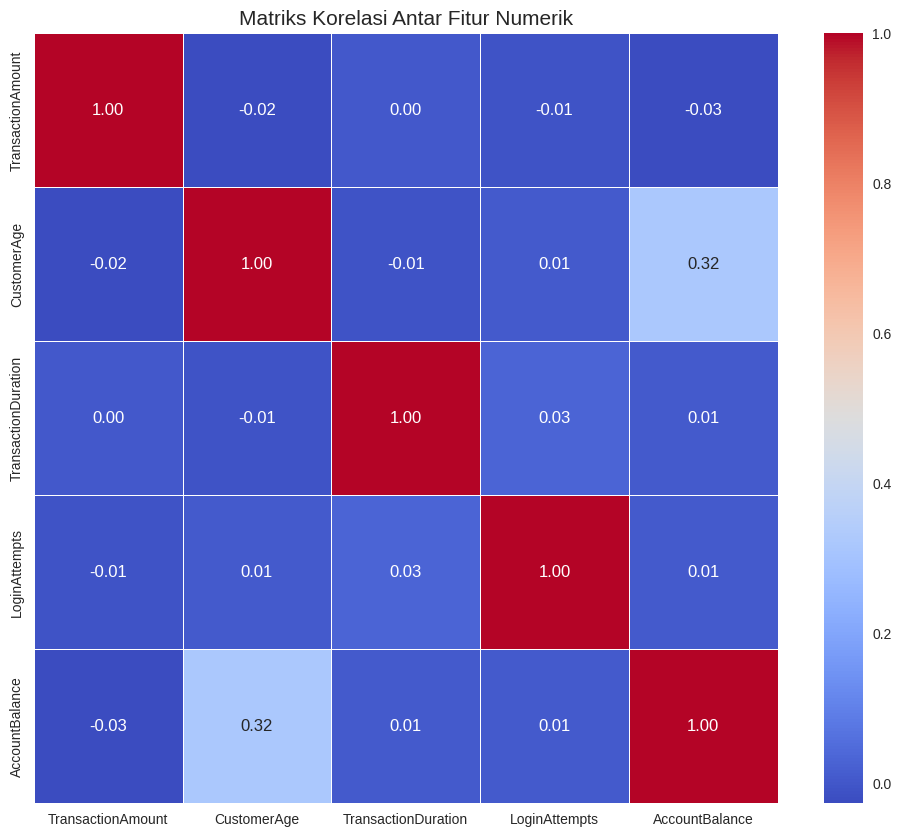

In [39]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
print("Matriks Korelasi Antar Fitur Numerik:")
# Mengidentifikasi kolom numerik berdasarkan tipe data, mengecualikan kolom ID jika masih ada
numerical_features_for_corr = df.select_dtypes(include=np.number).columns
# Hapus kolom 'CustomerID' jika ada di antara fitur numerik
if 'CustomerID' in numerical_features_for_corr:
    numerical_features_for_corr = numerical_features_for_corr.drop('CustomerID')


if len(numerical_features_for_corr) > 1:
    correlation_matrix = df[numerical_features_for_corr].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriks Korelasi Antar Fitur Numerik', fontsize=15)
    plt.show()
else:
    print("Tidak cukup fitur numerik (setelah eksklusi ID) untuk membuat matriks korelasi.")

  * **Metode yang digunakan**:

      * `df.select_dtypes(include=np.number).columns`: Metode ini digunakan untuk secara otomatis **mengidentifikasi dan memilih hanya kolom-kolom yang memiliki tipe data numerik** (misalnya, integer atau float) dari DataFrame `df`.
      * `numerical_features_for_corr.drop('CustomerID')`: Jika kolom 'CustomerID' (atau kolom ID lainnya yang bersifat numerik namun tidak relevan untuk analisis korelasi) terdeteksi, kode ini akan **menghapusnya** dari daftar fitur numerik yang akan dikorelasikan.
      * `df[numerical_features_for_corr].corr()`: Fungsi inti dari Pandas yang **menghitung koefisien korelasi Pearson** secara *pairwise* (pasangan) antar semua kolom numerik yang telah dipilih. Hasilnya adalah sebuah DataFrame matriks korelasi.
      * `plt.figure(figsize=(12, 10))`: Mengatur ukuran gambar (figure) untuk visualisasi agar cukup besar dan mudah dibaca.
      * `seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)`: Fungsi dari pustaka Seaborn yang digunakan untuk **memvisualisasikan matriks korelasi sebagai heatmap**.
          * `annot=True`: Menampilkan nilai koefisien korelasi pada setiap sel heatmap.
          * `cmap='coolwarm'`: Mengatur skema warna heatmap. 'coolwarm' biasanya merepresentasikan korelasi positif dengan warna hangat (merah) dan korelasi negatif dengan warna dingin (biru), sementara nilai mendekati nol berwarna netral.
          * `fmt=".2f"`: Memformat nilai anotasi menjadi dua angka di belakang koma.
          * `linewidths=.5`: Menambahkan garis tipis antar sel untuk memisahkan sel secara visual.
      * `plt.title(...)`: Memberikan judul yang informatif pada visualisasi.
      * `plt.show()`: Menampilkan plot yang telah dibuat.

  * **Alasan penggunaan**:

      * **Memahami Hubungan Antar Fitur**: Tujuan utama adalah untuk mengidentifikasi ada atau tidaknya hubungan linear antar variabel numerik. Informasi ini penting karena dapat memberikan *insight* awal tentang struktur data.
      * **Deteksi Multikolinearitas**: Meskipun untuk K-Means multikolinearitas tidak separah dampaknya pada model regresi, mengetahui adanya fitur yang sangat berkorelasi tinggi bisa menjadi pertimbangan dalam pemilihan fitur atau interpretasi model. Korelasi yang sangat tinggi bisa menunjukkan redundansi informasi.

  * **Insight dan Hasil yang didapat**:
      * **Output Visual (Heatmap Korelasi)**:
        Heatmap menampilkan matriks korelasi untuk fitur-fitur numerik: `TransactionAmount`, `CustomerAge`, `TransactionDuration`, `LoginAttempts`, dan `AccountBalance`.
      * **Interpretasi Heatmap**:
          * **Diagonal Utama**: Semua nilai pada diagonal utama adalah 1.00 (berwarna merah tua), yang menunjukkan bahwa korelasi setiap fitur dengan dirinya sendiri adalah sempurna dan positif, sesuai harapan.
          * **Korelasi Umumnya Lemah**: Sebagian besar sel di luar diagonal utama memiliki warna yang mendekati netral (putih/krem muda) dan nilai koefisien korelasi yang sangat dekat dengan 0. Ini mengindikasikan bahwa **hubungan linear antar pasangan fitur numerik yang dianalisis umumnya sangat lemah**.
          * **Contoh Nilai Korelasi Spesifik**:
              * `TransactionAmount` dan `CustomerAge`: Korelasi sebesar 0.00. Tidak ada hubungan linear yang terdeteksi.
              * `TransactionAmount` dan `AccountBalance`: Korelasi sebesar 0.03. Hubungan linear positif yang sangat lemah.
              * `CustomerAge` dan `TransactionDuration`: Korelasi sebesar 0.01. Hubungan linear positif yang sangat lemah.
              * `LoginAttempts` dengan fitur lainnya: Korelasi juga sangat dekat dengan 0 (misalnya, dengan `TransactionAmount` adalah -0.01, dengan `AccountBalance` adalah -0.02).
          * **Tidak Ada Multikolinearitas yang Jelas**: Karena semua korelasi antar fitur yang berbeda sangat rendah, tidak ada indikasi masalah multikolinearitas yang signifikan di antara fitur-fitur numerik ini dari perspektif hubungan linear.
          * **Implikasi untuk Clustering**: Lemahnya korelasi linear antar fitur numerik ini menyarankan bahwa setiap fitur cenderung memberikan informasi yang relatif independen (secara linear) untuk proses clustering. K-Means akan mempertimbangkan setiap fitur ini dalam menghitung jarak tanpa adanya pengaruh dominan dari korelasi linear yang kuat antar fitur. Namun, penting untuk diingat bahwa ketiadaan korelasi linear tidak meniadakan kemungkinan adanya hubungan non-linear yang mungkin lebih kompleks antar fitur.

Histogram untuk Fitur Numerik:


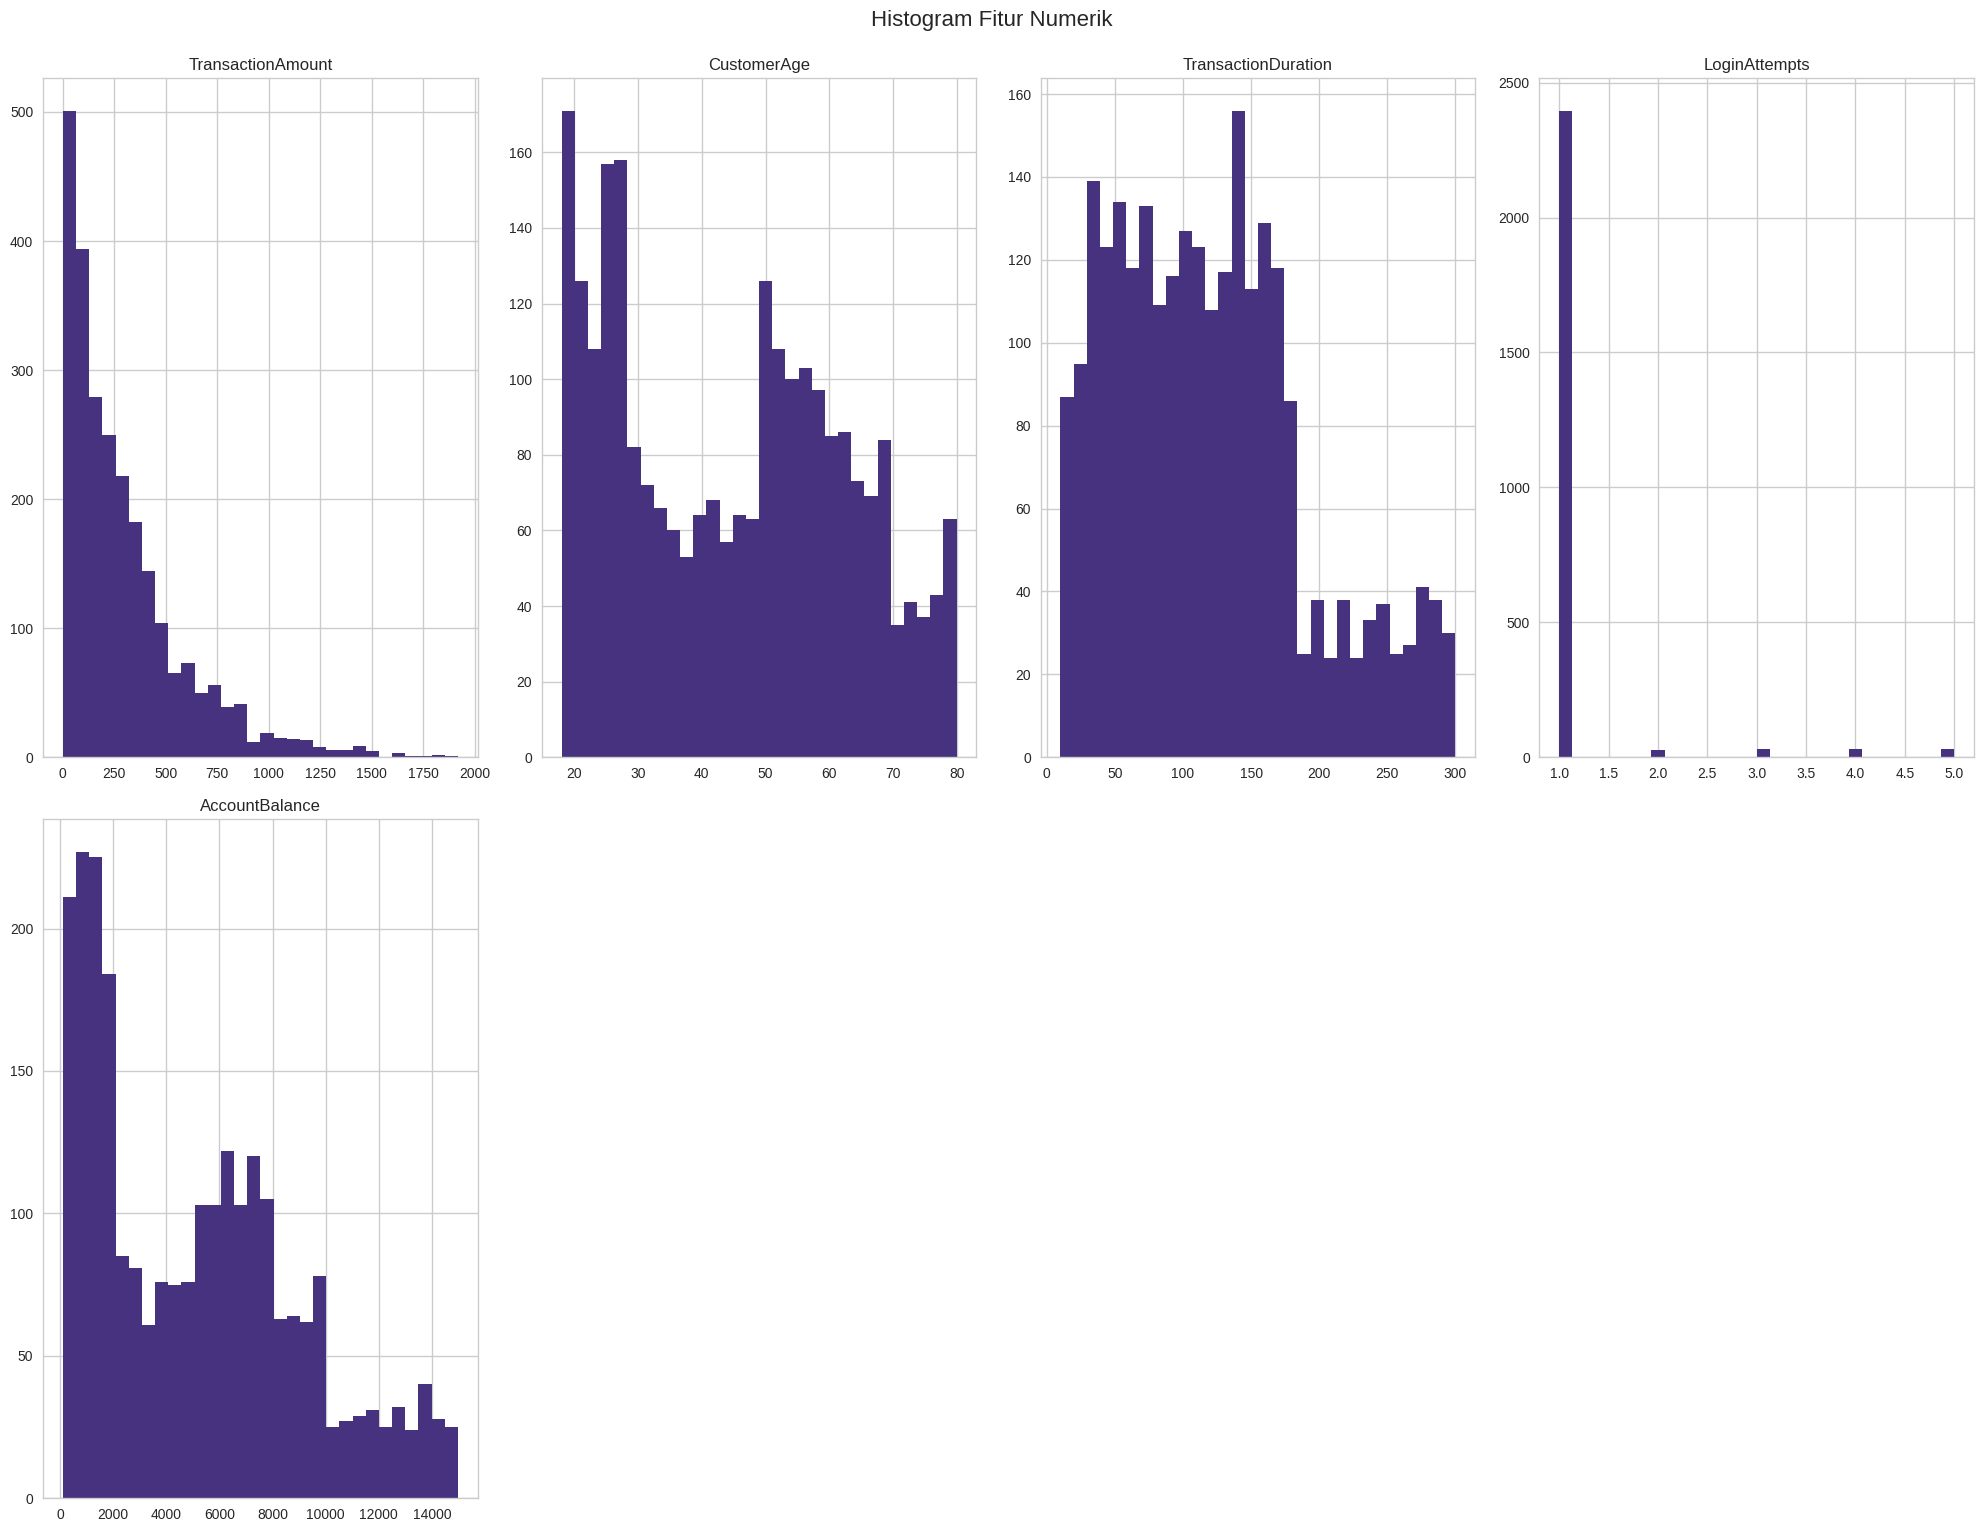

Distribusi untuk Fitur Kategorikal:


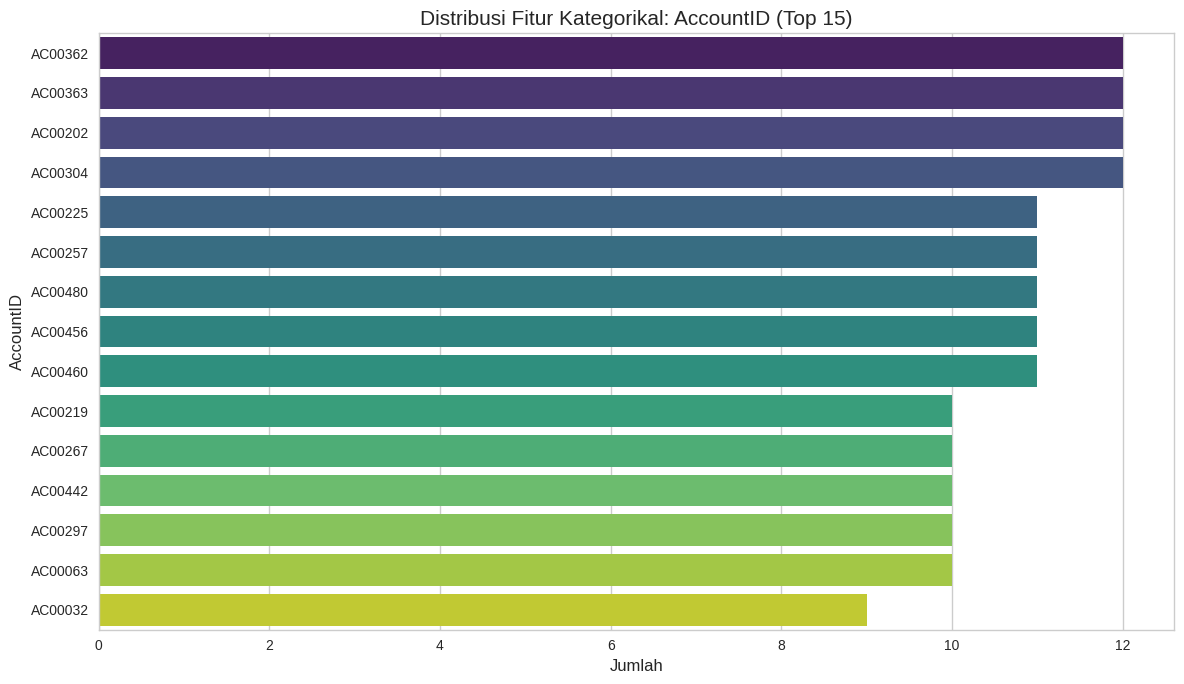

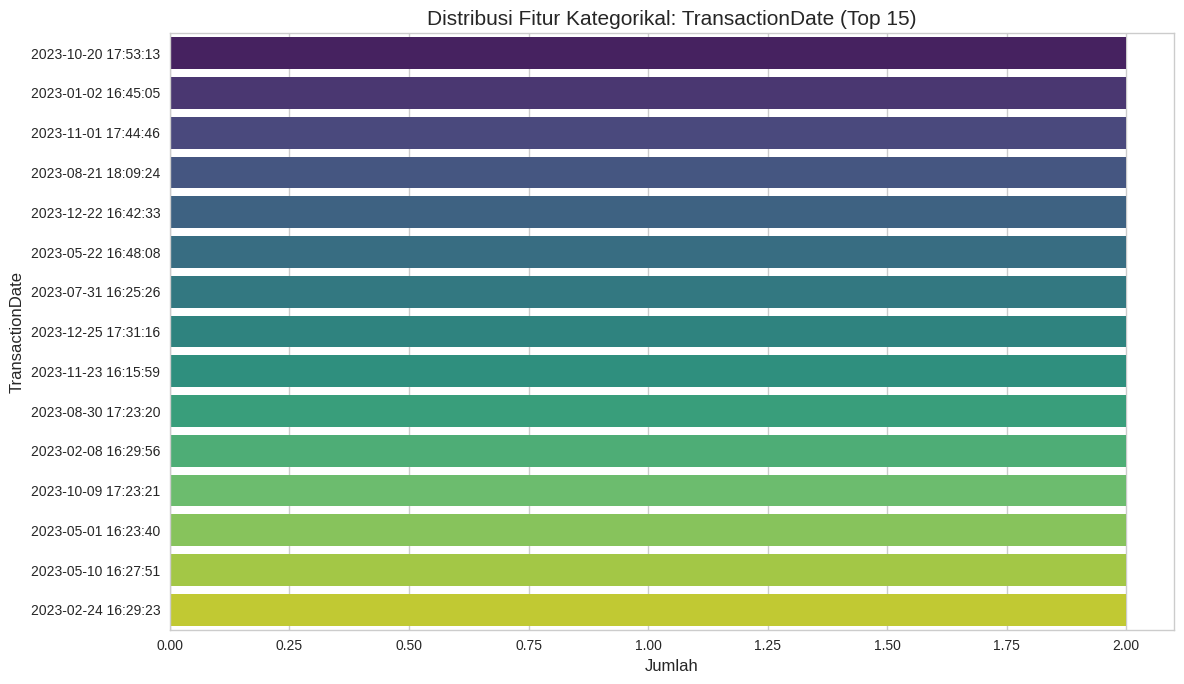

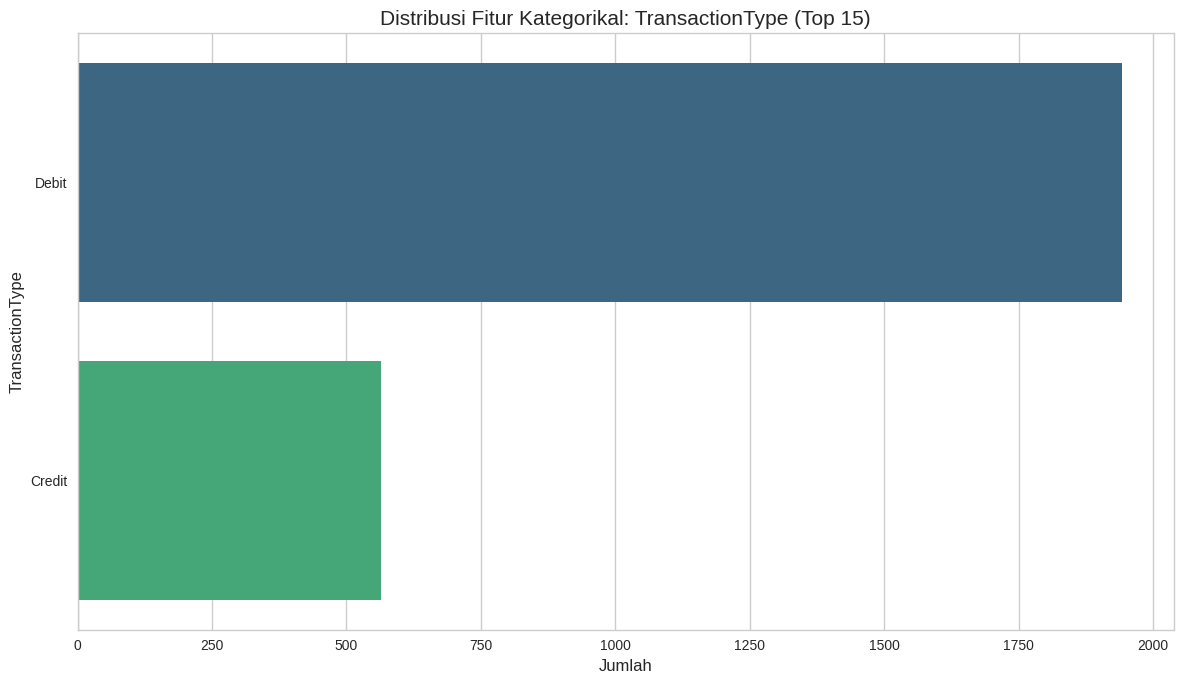

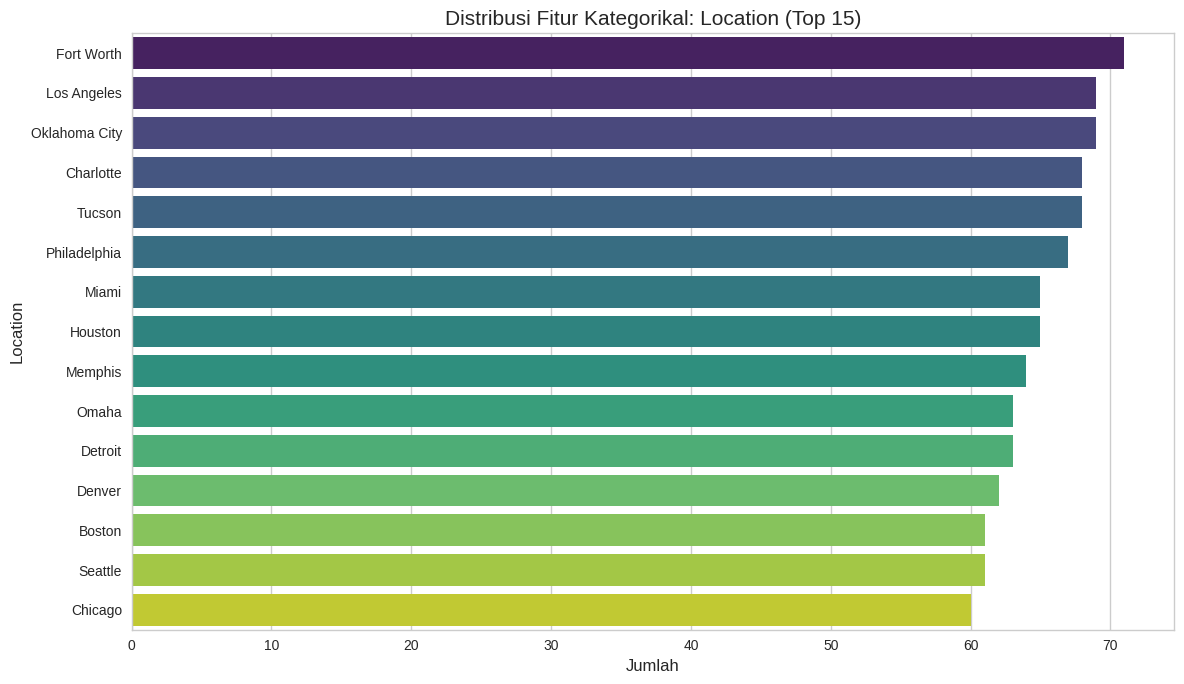

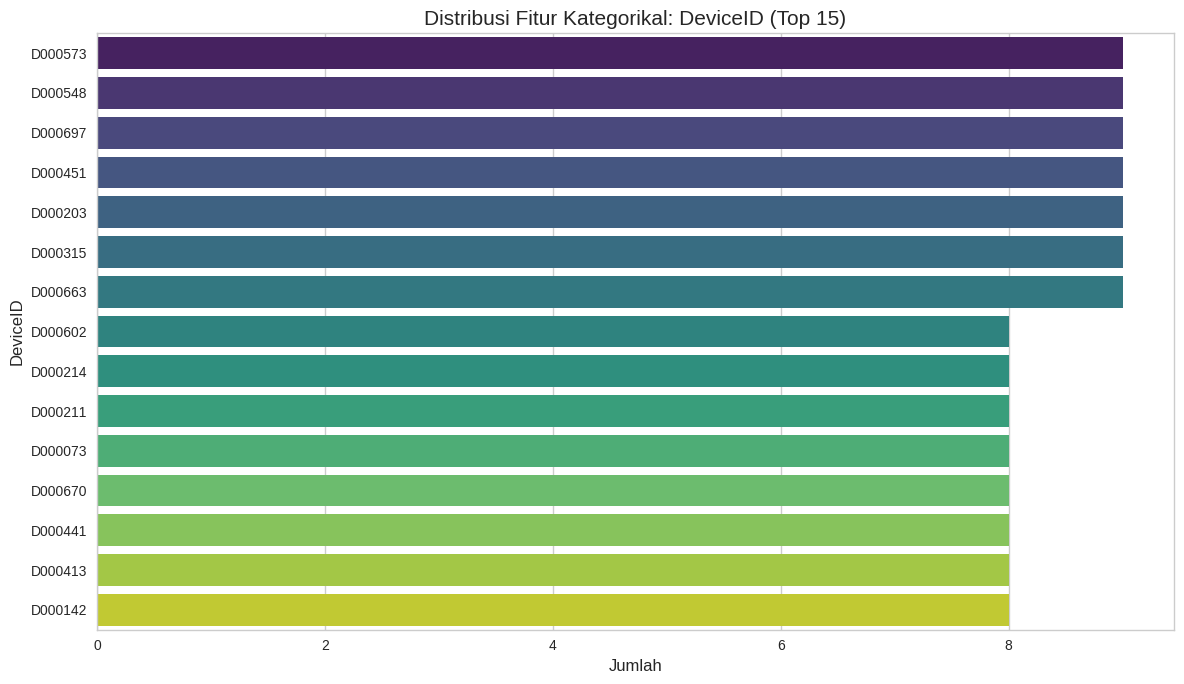

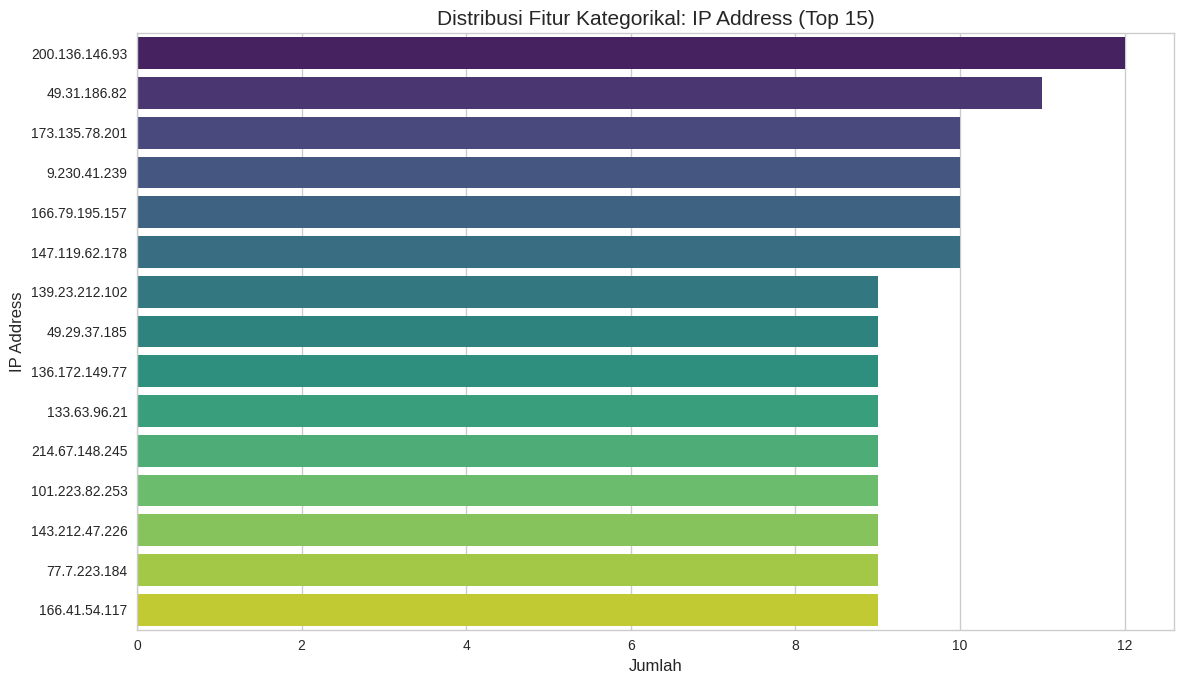

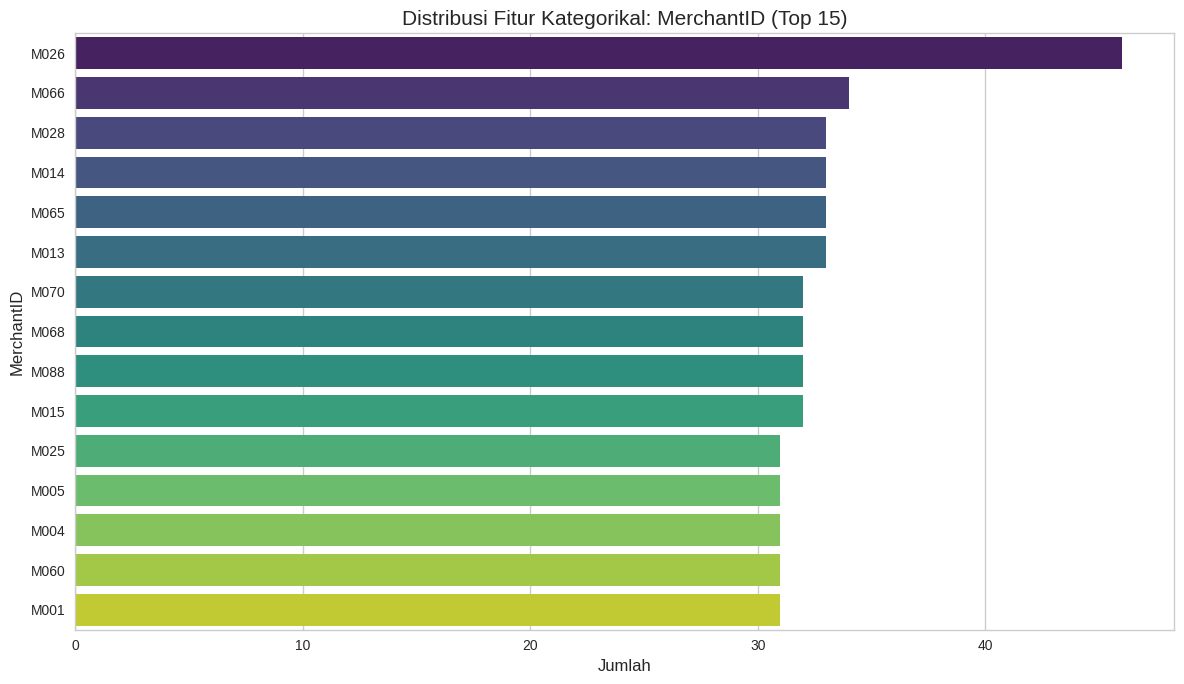

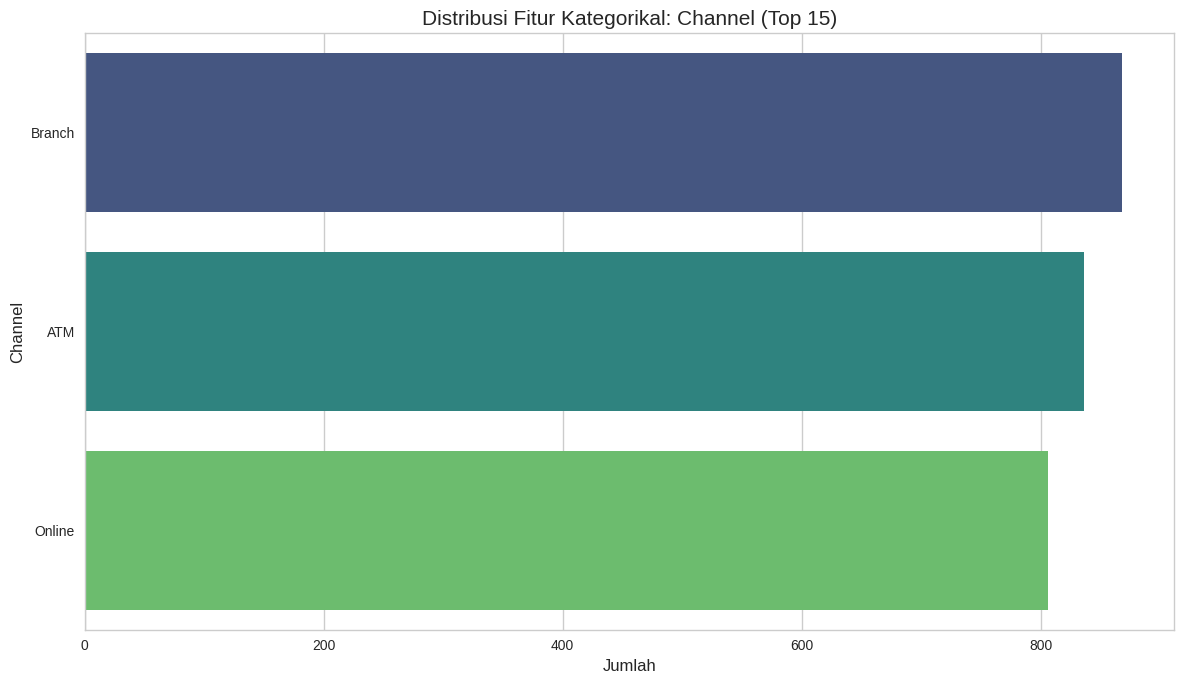

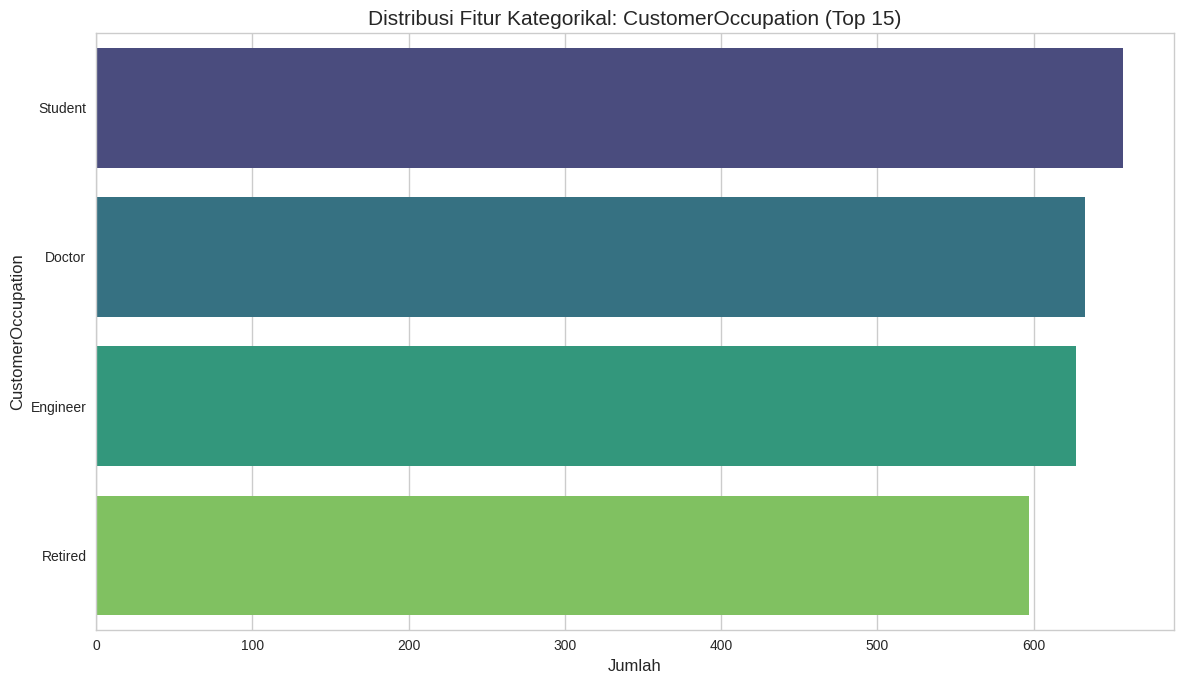

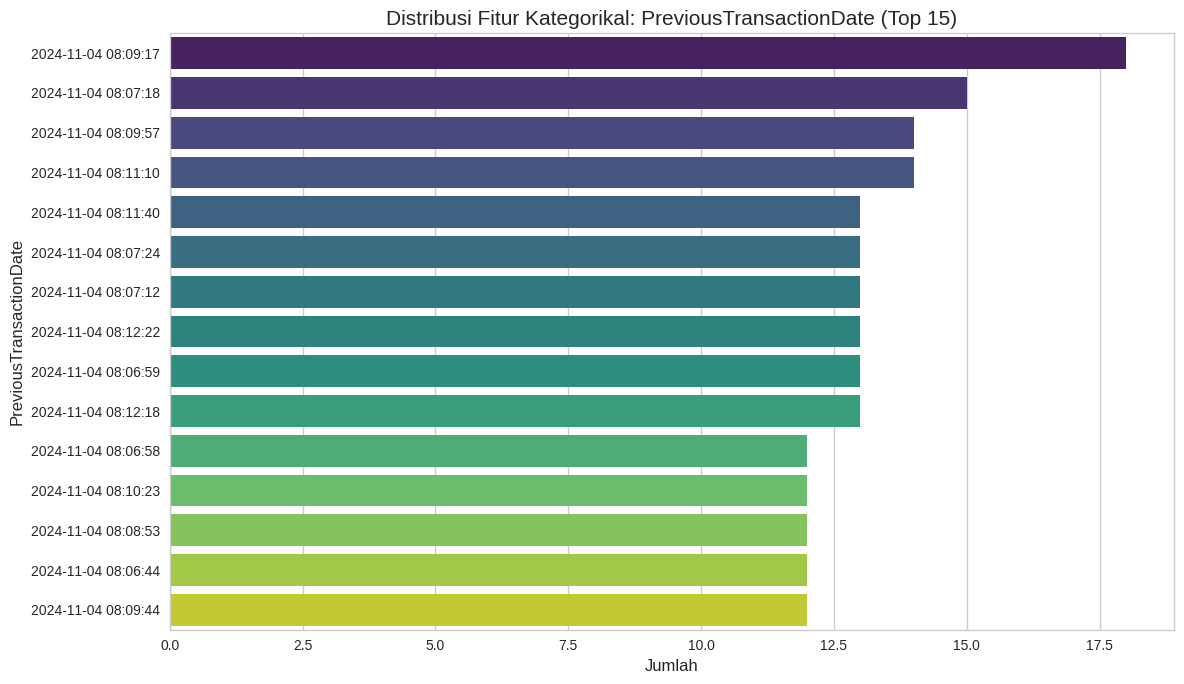

In [40]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
print("Histogram untuk Fitur Numerik:")
# Menggunakan list yang sama dengan korelasi (tanpa CustomerID)
if len(numerical_features_for_corr) > 0: # Menggunakan list yang sama dengan korelasi
    df[numerical_features_for_corr].hist(bins=30, figsize=(20, 15), layout=(-1, 4))
    plt.tight_layout()
    plt.suptitle('Histogram Fitur Numerik', y=1.02, fontsize=16)
    plt.show()
else:
    print("Tidak ada fitur numerik untuk membuat histogram.")

# Menampilkan countplot untuk semua kolom kategorikal (Opsional Skilled 1)
print("Distribusi untuk Fitur Kategorikal:")
categorical_features_for_hist = df.select_dtypes(include='object').columns
if 'TransactionID' in categorical_features_for_hist: # TransactionID mungkin object tapi bukan kategorikal sejati
    categorical_features_for_hist = categorical_features_for_hist.drop('TransactionID')


if len(categorical_features_for_hist) > 0:
    for col in categorical_features_for_hist:
        plt.figure(figsize=(12, 7)) # Ukuran disesuaikan agar lebih enak dilihat
        sns.countplot(y=col, data=df, order=df[col].value_counts().index[:15], palette='viridis') # Batasi top 15 kategori
        plt.title(f'Distribusi Fitur Kategorikal: {col} (Top 15)', fontsize=15)
        plt.xlabel('Jumlah', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.xticks(rotation=0) # Rotasi dihilangkan karena sumbu y
        plt.tight_layout()
        plt.show()
else:
    print("Tidak ada fitur kategorikal (setelah eksklusi ID) untuk membuat countplot.")

### Bagian 1: Histogram untuk Fitur Numerik

  * **Metode yang digunakan**:

      * `df[numerical_features_for_corr].hist(bins=30, figsize=(20, 15), layout=(-1, 4))`: Fungsi dari Pandas (yang menggunakan Matplotlib di belakang layar) untuk membuat **histogram** bagi setiap kolom yang ada dalam `numerical_features_for_corr` (daftar fitur numerik yang sudah diidentifikasi sebelumnya, tidak termasuk ID pelanggan).
          * `bins=30`: Menentukan jumlah interval (keranjang) yang digunakan untuk mengelompokkan data dalam membuat histogram. Semakin banyak bin, semakin detail distribusinya terlihat.
          * `figsize=(20, 15)`: Mengatur ukuran total gambar yang akan berisi semua subplot histogram.
          * `layout=(-1, 4)`: Mengatur tata letak subplot histogram agar ditampilkan dalam grid dengan maksimal 4 kolom. Jumlah baris akan disesuaikan secara otomatis (`-1`).
      * `plt.tight_layout()`: Menyesuaikan parameter subplot secara otomatis agar pas dan tidak tumpang tindih.
      * `plt.suptitle(...)`: Menambahkan judul utama untuk keseluruhan set histogram.
      * `plt.show()`: Menampilkan semua plot yang telah dibuat.

  * **Alasan penggunaan**:

      * **Memahami Distribusi Fitur Numerik**: Histogram memberikan representasi visual dari distribusi frekuensi nilai-nilai dalam sebuah fitur numerik. Ini membantu untuk memahami:
          * **Bentuk Distribusi**: Apakah simetris (normal), miring ke kiri (left-skewed), miring ke kanan (right-skewed), unimodal (satu puncak), bimodal (dua puncak), atau multimodal.
          * **Pemusatan Data**: Di mana sebagian besar data terkonsentrasi.
          * **Penyebaran Data**: Seberapa lebar rentang nilai data.
          * **Potensi Outlier**: Nilai-nilai yang terletak jauh dari sebagian besar data.

  * **Insight dan Hasil yang didapat**:

      * **Interpretasi Setiap Histogram**:

          * **`TransactionAmount`**:
              * **Bentuk**: Distribusi sangat **miring ke kanan (right-skewed)**. Sebagian besar transaksi memiliki jumlah yang relatif kecil (terlihat dari bar tinggi di sisi kiri), dengan frekuensi yang menurun drastis untuk jumlah transaksi yang lebih besar. Ekor panjang ke kanan menunjukkan adanya transaksi dengan nilai yang jauh lebih tinggi dibandingkan mayoritas.
              * **Insight**: Mengindikasikan bahwa transaksi bernilai rendah adalah yang paling umum. Transaksi bernilai sangat tinggi bisa dianggap sebagai potensi outlier. Ini adalah pola yang umum dalam data transaksi keuangan.
          * **`CustomerAge`**:
              * **Bentuk**: Distribusi tampak **relatif merata atau sedikit multimodal** dengan beberapa puncak kecil, mencakup rentang usia dari sekitar 18 hingga 80 tahun. Tidak ada kemiringan yang ekstrem.
              * **Insight**: Pelanggan berasal dari berbagai kelompok usia. Tidak ada satu kelompok usia yang sangat mendominasi.
          * **`TransactionDuration`**:
              * **Bentuk**: Distribusi juga tampak **miring ke kanan (right-skewed)**, meskipun tidak seekstrem `TransactionAmount`. Banyak transaksi memiliki durasi yang lebih pendek, dengan beberapa transaksi memiliki durasi yang jauh lebih lama.
              * **Insight**: Sebagian besar transaksi diselesaikan dengan cepat. Durasi yang sangat panjang bisa jadi memerlukan investigasi atau merupakan karakteristik khusus dari jenis transaksi tertentu.
          * **`LoginAttempts`**:
              * **Bentuk**: Distribusi sangat **terkonsentrasi pada nilai 1** (bar tertinggi ada di angka 1). Ada frekuensi yang jauh lebih kecil untuk 2, 3, dan seterusnya.
              * **Insight**: Mayoritas transaksi berhasil login pada percobaan pertama. Kasus di mana percobaan login lebih dari satu kali jauh lebih jarang.
          * **`AccountBalance`**:
              * **Bentuk**: Distribusi tampak **relatif simetris atau sedikit miring ke kanan**, dengan konsentrasi nilai di sekitar bagian tengah rentang.
              * **Insight**: Saldo akun pelanggan tersebar, dengan sebagian besar berada di sekitar nilai tengah, namun ada juga akun dengan saldo yang lebih tinggi.

### Bagian 2: Countplot untuk Fitur Kategorikal

  * **Metode yang digunakan**:

      * `df.select_dtypes(include='object').columns`: Mengidentifikasi dan memilih kolom-kolom yang bertipe data `object`, yang umumnya merepresentasikan fitur kategorikal.
      * `categorical_features_for_hist.drop('TransactionID')`: Jika 'TransactionID' ada dalam daftar fitur kategorikal (karena ID bisa saja berupa string/object), kolom ini akan dihapus karena ID bukanlah fitur kategorikal yang relevan untuk analisis distribusi frekuensi kategori.
      * `seaborn.countplot(y=col, data=df, order=df[col].value_counts().index[:15], palette='viridis')`: Fungsi dari Seaborn untuk membuat **bar plot (countplot)** yang menunjukkan frekuensi (jumlah kemunculan) dari setiap kategori dalam sebuah fitur kategorikal.
          * `y=col`: Membuat bar plot horizontal, yang seringkali lebih baik untuk label kategori yang panjang.
          * `order=df[col].value_counts().index[:15]`: Mengurutkan bar berdasarkan frekuensi dari yang paling banyak ke yang paling sedikit, dan **hanya menampilkan 15 kategori teratas**. Ini sangat berguna untuk fitur dengan kardinalitas tinggi (banyak kategori unik) agar plot tidak terlalu padat.
          * `palette='viridis'`: Mengatur skema warna untuk bar.
      * Looping `for col in categorical_features_for_hist:`: Membuat countplot terpisah untuk setiap fitur kategorikal yang valid.

  * **Alasan penggunaan**:

      * **Memahami Distribusi Fitur Kategorikal**: Countplot memberikan visualisasi yang jelas tentang frekuensi relatif (jumlah) dari setiap kategori dalam suatu fitur. Ini membantu untuk:
          * Mengidentifikasi kategori mana yang paling dominan atau paling jarang muncul.
          * Memahami variasi dalam data kategorikal.

  * **Insight dan Hasil yang didapat**:

      * **Output Visual (Rangkaian Countplot)**:
      * **Interpretasi Setiap Countplot (Contoh berdasarkan beberapa gambar yang relevan)**:
          * **`TransactionType`** (`image_a03357.png`):
              * **Bentuk**: Hanya ada dua kategori, 'Debit' dan 'Credit'. Bar untuk 'Debit' jauh lebih panjang daripada 'Credit'.
              * **Insight**: Transaksi 'Debit' secara signifikan lebih umum daripada transaksi 'Credit' dalam dataset ini. Ini adalah informasi penting tentang perilaku transaksi secara keseluruhan.
          * **`Location`** (`image_a032db.png`):
              * **Bentuk**: Menampilkan 15 lokasi teratas. Terlihat ada beberapa kota (misalnya, Fort Worth, San Antonio, Houston, Austin, Dallas) dengan frekuensi yang relatif tinggi, sementara yang lain lebih rendah. Distribusinya tidak merata.
              * **Insight**: Ada konsentrasi geografis transaksi pada beberapa kota tertentu. Ini bisa relevan untuk strategi pemasaran berbasis lokasi.
          * **`Channel`** (`image_a03016.png`):
              * **Bentuk**: Menampilkan frekuensi untuk tiga channel: 'Branch', 'Online', dan 'ATM'. 'Branch' adalah yang paling sering, diikuti 'Online', lalu 'ATM'.
              * **Insight**: Channel 'Branch' adalah yang paling populer, menunjukkan bahwa transaksi fisik di cabang masih signifikan. Penggunaan channel 'Online' juga cukup tinggi.
          * **`CustomerOccupation`** (`image_a03010.png`):
              * **Bentuk**: Menampilkan empat kategori pekerjaan: 'Student', 'Engineer', 'Doctor', dan 'Unemployed'. 'Student' memiliki frekuensi tertinggi, diikuti oleh yang lain dengan frekuensi yang lebih rendah dan relatif sebanding.
              * **Insight**: 'Student' merupakan segmen pekerjaan terbesar dalam dataset ini. Ini bisa mempengaruhi jenis produk atau layanan yang diminati.
          * **Fitur dengan Kardinalitas Tinggi (`AccountID`, `DeviceID`, `IP Address`, `MerchantID`, `PreviousTransactionDate`)**:
              * **Bentuk**: Untuk fitur-fitur ini, countplot hanya menampilkan 15 nilai unik teratas. Bar-bar akan menunjukkan frekuensi masing-masing nilai unik tersebut. Banyak ID akan memiliki frekuensi rendah (misalnya 1 atau 2), kecuali ada ID tertentu yang sangat aktif. Misal pada `AccountID`, `AC00362` muncul paling sering (sesuai `describe` output).
              * **Insight**: Mengidentifikasi akun, perangkat, atau merchant yang paling aktif. Namun, untuk analisis distribusi penuh fitur berkardinalitas tinggi, countplot terbatas pada top 15 kurang ideal, tetapi ini adalah kompromi yang masuk akal untuk menjaga kejelasan visualisasi.

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Box Plot untuk Fitur Numerik:


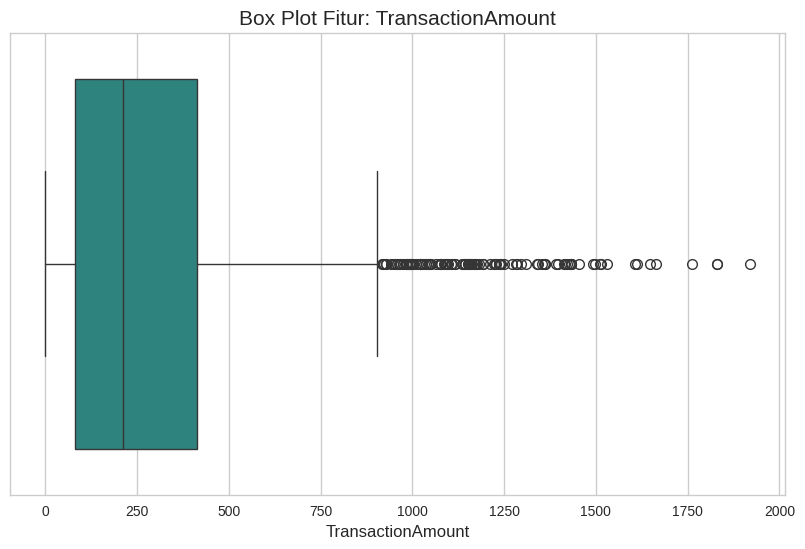

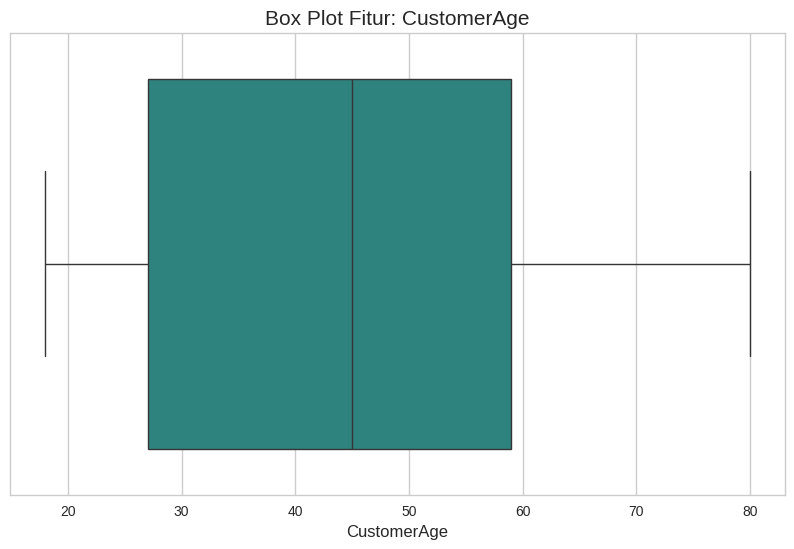

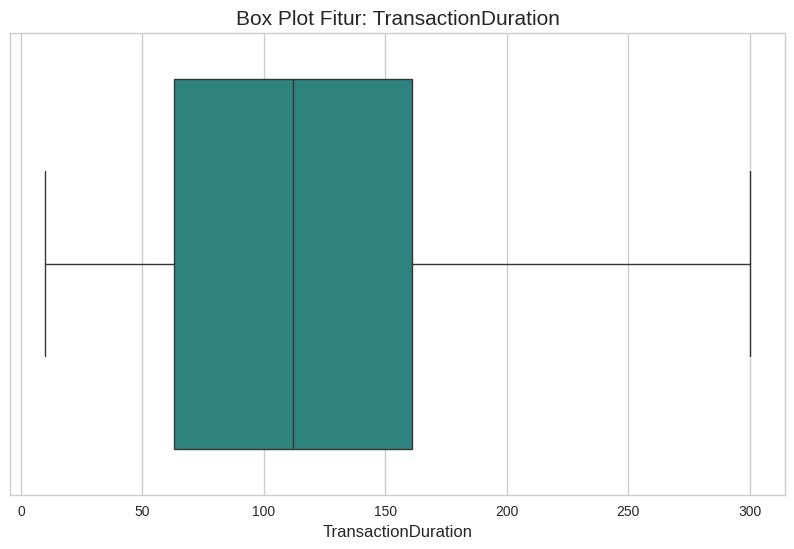

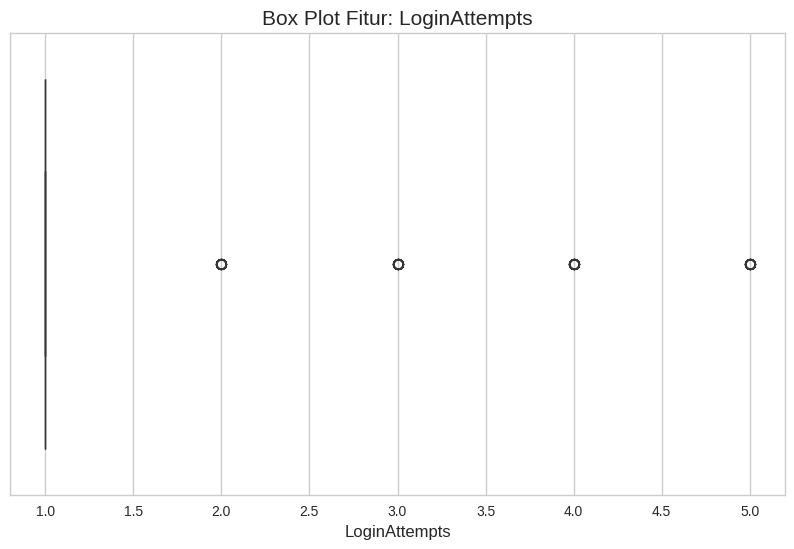

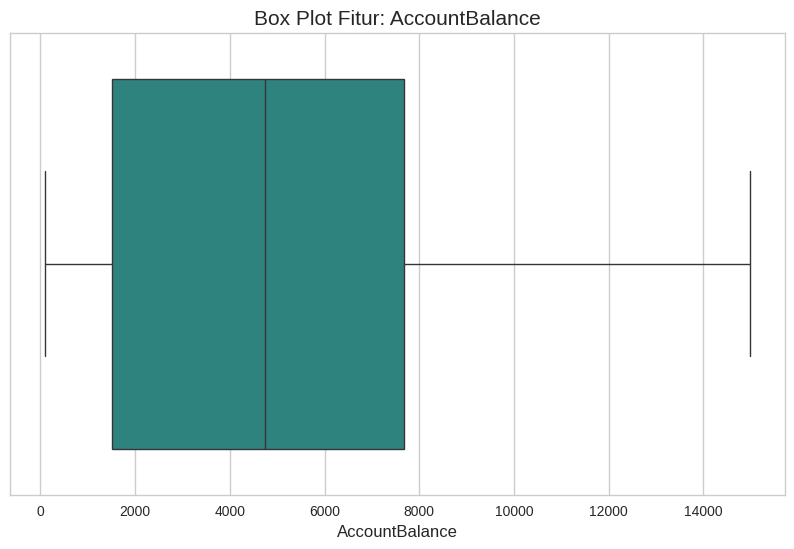

Pair Plot untuk beberapa Fitur Numerik:


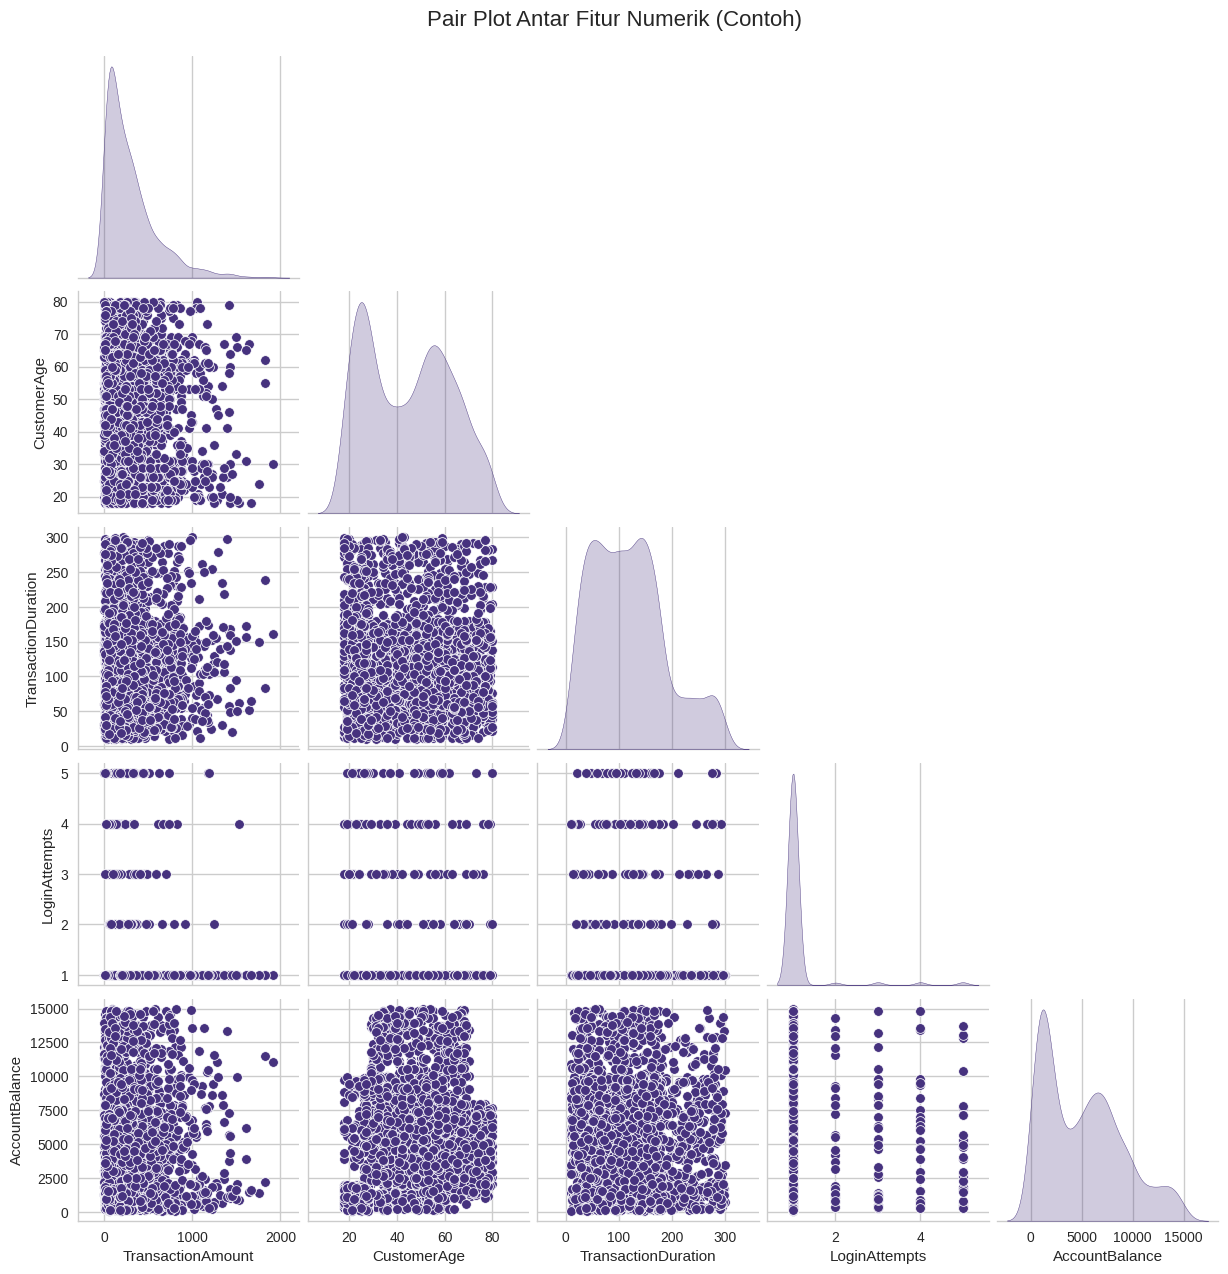

In [41]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Box plot untuk fitur numerik untuk melihat sebaran dan outlier
print("Box Plot untuk Fitur Numerik:")
# Menggunakan numerical_features_for_corr (tanpa CustomerID)
if len(numerical_features_for_corr) > 0:
    for col in numerical_features_for_corr:
        plt.figure(figsize=(10, 6)) # Ukuran disesuaikan
        sns.boxplot(x=df[col], palette='viridis')
        plt.title(f'Box Plot Fitur: {col}', fontsize=15)
        plt.xlabel(col, fontsize=12)
        plt.show()
else:
    print("Tidak ada fitur numerik untuk membuat box plot.")

# Pairplot untuk melihat hubungan antar beberapa fitur numerik (pilih beberapa jika terlalu banyak)
print("Pair Plot untuk beberapa Fitur Numerik:")
if len(numerical_features_for_corr) > 1:
    # Pilih maksimal 5 fitur untuk pairplot agar tidak terlalu padat
    sample_numerical_features = numerical_features_for_corr[:min(5, len(numerical_features_for_corr))]
    if len(sample_numerical_features) > 1:
        sns.pairplot(df[sample_numerical_features], diag_kind='kde', corner=True)
        plt.suptitle('Pair Plot Antar Fitur Numerik (Contoh)', y=1.02, fontsize=16)
        plt.show()
    else:
        print("Tidak cukup fitur numerik yang dipilih untuk pairplot (minimal 2).")
else:
    print("Tidak cukup fitur numerik untuk membuat pair plot.")

### Bagian 1: Box Plot untuk Fitur Numerik

  * **Metode yang digunakan**:

      * `for col in numerical_features_for_corr:`: Melakukan iterasi (looping) untuk setiap fitur numerik yang telah diidentifikasi sebelumnya dalam `numerical_features_for_corr`.
      * `plt.figure(figsize=(10, 6))`: Membuat area gambar baru untuk setiap box plot dengan ukuran yang ditentukan agar visualisasi jelas.
      * `seaborn.boxplot(x=df[col], palette='viridis')`: Fungsi dari pustaka Seaborn untuk membuat **box plot** (diagram kotak garis) untuk fitur `col` dari DataFrame `df`.
          * `x=df[col]`: Menentukan data yang akan divisualisasikan pada sumbu x (karena ini adalah box plot univariat).
          * `palette='viridis'`: Mengatur skema warna untuk box plot.
      * `plt.title(...)` dan `plt.xlabel(...)`: Menambahkan judul dan label sumbu x yang informatif pada setiap plot.
      * `plt.show()`: Menampilkan box plot yang telah dibuat.

  * **Alasan penggunaan**:

      * **Identifikasi Sebaran Data dan Outlier**: Box plot sangat efektif untuk secara visual merangkum distribusi data numerik melalui ringkasan lima angka (minimum, kuartil pertama/Q1, median/Q2, kuartil ketiga/Q3, dan maksimum) dan secara eksplisit menunjukkan **outlier** (titik data yang berada di luar "kumis"/whiskers).
      * **Memahami Variabilitas**: Panjang kotak (IQR = Q3 - Q1) dan panjang kumis memberikan gambaran tentang variabilitas atau penyebaran data.
      * **Deteksi Kemiringan (Skewness)**: Posisi median di dalam kotak dan panjang relatif kumis dapat memberikan indikasi awal tentang kemiringan distribusi.

  * **Insight dan Hasil yang didapat**:

      * **Interpretasi Setiap Box Plot**:

          * **`TransactionAmount`** (`image_9fca7b.jpg`):
              * **Sebaran**: Kotak (IQR) relatif sempit dan terletak di bagian bawah rentang nilai, menunjukkan bahwa sebagian besar transaksi memiliki nilai yang terkonsentrasi di angka rendah.
              * **Outlier**: Terdapat **banyak outlier** di sisi kanan (nilai tinggi), yang ditandai sebagai titik-titik individual di luar kumis atas. Ini mengonfirmasi observasi dari histogram bahwa distribusi `TransactionAmount` sangat miring ke kanan.
              * **Insight**: Mayoritas transaksi bernilai kecil, namun ada sejumlah transaksi dengan nilai yang jauh lebih tinggi yang dianggap sebagai outlier. Ini adalah karakteristik umum data transaksi dan memerlukan perhatian khusus dalam pra-pemrosesan.
          * **`CustomerAge`** (`image_9fca9c.png`):
              * **Sebaran**: Kotak tampak cukup simetris, dengan median berada di tengah kotak. Kumis atas dan bawah memiliki panjang yang sebanding.
              * **Outlier**: **Tidak ada outlier yang terlihat jelas** di luar kumis.
              * **Insight**: Distribusi usia pelanggan relatif simetris dan tidak menunjukkan adanya nilai usia yang ekstrem atau tidak wajar. Rentang usia pelanggan cukup merata.
          * **`TransactionDuration`** (`image_9fcad2.png`):
              * **Sebaran**: Kotak sedikit condong ke kiri, dengan median sedikit di bawah tengah kotak. Kumis kanan lebih panjang dari kumis kiri.
              * **Outlier**: Terdapat **beberapa outlier** di sisi kanan (durasi tinggi).
              * **Insight**: Sebagian besar transaksi memiliki durasi yang relatif singkat hingga sedang. Ada beberapa transaksi dengan durasi yang jauh lebih lama yang dianggap outlier.
          * **`LoginAttempts`** (`image_9fcd7d.png`):
              * **Sebaran**: Kotak sangat sempit dan berada di nilai 1. Ini karena Q1, median (Q2), dan Q3 kemungkinan besar semuanya bernilai 1.
              * **Outlier**: Terdapat **outlier** pada nilai 2, 3, 4, dan 5 (jika ada dalam data). Titik-titik ini menunjukkan jumlah percobaan login yang lebih dari mayoritas.
              * **Insight**: Mayoritas absolut transaksi berhasil login pada percobaan pertama. Setiap nilai di atas 1 dapat dianggap sebagai kasus yang kurang umum atau berpotensi outlier.
          * **`AccountBalance`** (`image_9fcda0.png`):
              * **Sebaran**: Kotak tampak relatif simetris, dengan median berada di tengah. Kumis atas dan bawah memiliki panjang yang sebanding.
              * **Outlier**: **Tidak ada outlier yang terlihat jelas** di luar kumis.
              * **Insight**: Distribusi saldo akun pelanggan cukup merata dan simetris tanpa nilai ekstrem yang signifikan.

### Bagian 2: Pairplot untuk Beberapa Fitur Numerik

  * **Metode yang digunakan**:

      * `sample_numerical_features = numerical_features_for_corr[:min(5, len(numerical_features_for_corr))]`: Memilih subset fitur numerik untuk ditampilkan dalam pairplot. Kode ini dengan bijak **membatasi maksimal 5 fitur** untuk menjaga agar plot tidak terlalu padat dan komputasinya tidak terlalu lama. Jika jumlah fitur numerik kurang dari 5, semua fitur akan digunakan.
      * `seaborn.pairplot(df[sample_numerical_features], diag_kind='kde', corner=True)`: Fungsi dari Seaborn untuk membuat **matriks plot (pairplot)**.
          * Untuk setiap pasangan fitur dalam `sample_numerical_features`, fungsi ini akan membuat **scatter plot** (plot tebar) untuk menunjukkan hubungan antara kedua fitur tersebut.
          * `diag_kind='kde'`: Pada bagian diagonal matriks (di mana fitur akan dipasangkan dengan dirinya sendiri), fungsi ini akan menampilkan **Kernel Density Estimate (KDE) plot**, yang merupakan versi yang lebih halus dari histogram untuk menunjukkan distribusi probabilitas fitur tersebut.
          * `corner=True`: Hanya menampilkan bagian bawah matriks plot (termasuk diagonal). Ini dilakukan karena matriks korelasi/pairplot bersifat simetris (plot antara Fitur A dan Fitur B sama dengan Fitur B dan Fitur A), sehingga menampilkan setengahnya saja sudah cukup dan lebih ringkas.
      * `plt.suptitle(...)`: Menambahkan judul utama untuk keseluruhan pairplot.

  * **Alasan penggunaan**:

      * **Visualisasi Hubungan Bivariat**: Pairplot memungkinkan untuk secara cepat memvisualisasikan hubungan antara setiap pasangan fitur numerik dalam dataset (atau subsetnya). Ini membantu untuk melihat pola, tren, atau korelasi visual.
      * **Distribusi Individual**: Plot KDE pada diagonal memberikan gambaran tentang distribusi masing-masing fitur secara individual.
      
  * **Insight dan Hasil yang didapat**:

      * **Interpretasi Pairplot**:

          * **Diagonal (KDE Plots)**:
              * `TransactionAmount`: KDE menunjukkan distribusi yang sangat miring ke kanan, dengan puncak tinggi di nilai rendah dan ekor panjang ke kanan (konsisten dengan histogram dan box plot).
              * `CustomerAge`: KDE menunjukkan distribusi yang lebih merata, mungkin sedikit multimodal (konsisten dengan histogram dan box plot).
              * `TransactionDuration`: KDE menunjukkan kemiringan ke kanan (konsisten dengan histogram dan box plot).
              * `LoginAttempts`: KDE sangat terkonsentrasi di nilai 1, dengan puncak yang sangat tajam (konsisten dengan histogram dan box plot).
              * `AccountBalance`: KDE menunjukkan distribusi yang relatif simetris (konsisten dengan histogram dan box plot).
          * **Off-Diagonal (Scatter Plots)**:
              * Secara umum, sebagian besar scatter plot **tidak menunjukkan pola linear atau non-linear yang jelas dan kuat** antar pasangan fitur. Titik-titik data tampak tersebar tanpa membentuk tren yang kentara.
              * Misalnya, scatter plot antara `TransactionAmount` dan `CustomerAge` tidak menunjukkan bahwa usia tertentu cenderung melakukan transaksi dengan jumlah lebih besar atau lebih kecil secara sistematis.
              * Scatter plot antara `TransactionAmount` dan `AccountBalance` mungkin menunjukkan sedikit kecenderungan (sangat lemah) bahwa saldo yang lebih tinggi sedikit terkait dengan variasi transaksi yang lebih besar, tetapi polanya tidak kuat.
              * Karena `LoginAttempts` sangat terkonsentrasi pada nilai 1, scatter plot yang melibatkan fitur ini akan menunjukkan sebagian besar titik data berbaris secara vertikal atau horizontal di sekitar nilai tersebut.
          * **Implikasi**: Ketiadaan pola yang jelas dalam scatter plot mengindikasikan bahwa hubungan antar fitur numerik ini mungkin kompleks atau tidak dominan secara bivariat. Ini sejalan dengan matriks korelasi sebelumnya yang juga menunjukkan korelasi linear yang lemah. Tidak terlihat adanya pengelompokan alami yang sangat jelas hanya dari visualisasi pasangan fitur ini.

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [42]:
# Mengecek dataset menggunakan isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())


Jumlah Missing Values per Kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


* **Metode yang digunakan**:

    * `df.isnull().sum()`: Metode Pandas yang menghitung jumlah nilai `NaN` (Not a Number) atau missing values untuk setiap kolom dalam DataFrame `df`.



* **Alasan penggunaan**:

    * Ini adalah langkah fundamental dalam pembersihan data untuk mengidentifikasi secara akurat kolom mana saja yang mengandung data hilang dan berapa banyak. Informasi ini akan menjadi dasar untuk strategi penanganan missing values (misalnya, imputasi atau penghapusan).



* **Insight dan Hasil yang didapat**:

    * **Output**: Jumlah Missing values

    * **Insight**:

        * Output ini secara jelas menunjukkan bahwa **semua kolom** dalam dataset memiliki missing values.

        * Jumlah missing values bervariasi per kolom, dari 18 (untuk `CustomerAge`) hingga 30 (untuk `TransactionType`, `Location`, `DeviceID`).

        * Dengan semua kolom memiliki missing values, strategi penanganan yang cermat diperlukan. Menghapus semua baris dengan missing values (listwise deletion) kemungkinan akan menghilangkan sebagian besar data. Oleh karena itu, imputasi akan menjadi pendekatan yang lebih sesuai.

In [43]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())


Jumlah Data Duplikat:
21


* **Metode yang digunakan**:

    * `df.duplicated().sum()`: Metode Pandas yang pertama-tama mengidentifikasi baris-baris yang merupakan duplikat dari baris lain sebelumnya dalam DataFrame (menghasilkan Series boolean), kemudian `.sum()` menjumlahkan nilai `True` (yang merepresentasikan baris duplikat).



* **Alasan penggunaan**:

    * Mengidentifikasi keberadaan baris data yang identik sepenuhnya. Data duplikat dapat menyebabkan bias dalam analisis dan pemodelan, serta menggelembungkan ukuran dataset secara tidak perlu.



* **Insight dan Hasil yang didapat**:

    * **Output**: Jumlah Data Duplikat
    * **Insight**:

        * Terdapat **21 baris duplikat** dalam dataset.

        * Baris-baris duplikat ini perlu dihapus untuk memastikan setiap entri data unik dan analisis yang dilakukan lebih valid.


In [44]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
print("Feature Scaling untuk Fitur Numerik:")

# Pilih hanya kolom numerik untuk scaling.
# Ini memastikan bahwa hanya fitur yang sudah diproses (encoded) atau asli numerik yang akan di-scale.
features_to_scale = df.select_dtypes(include=np.number).columns.tolist()

# Kita gunakan StandardScaler karena lebih umum dan kurang sensitif terhadap outlier dibandingkan MinMaxScaler
# setelah capping outlier dilakukan.
scaler = StandardScaler() # Atau MinMaxScaler()
if len(features_to_scale) > 0:
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
    print("Dataset setelah scaling semua fitur (head):")
    print(df.head())
else:
    print("Tidak ada fitur untuk di-scale.")

Feature Scaling untuk Fitur Numerik:
Dataset setelah scaling semua fitur (head):
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.970546  2023-04-11 16:29:14   
1      TX000002   AC00455           0.268963  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586526  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387294  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.972736  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionD

* **Metode yang digunakan**:

    * `df.select_dtypes(include=np.number).columns.tolist()`: Mengidentifikasi semua kolom yang bertipe numerik dalam DataFrame `df`.

    * `StandardScaler()`: Menginisialisasi objek StandardScaler dari `sklearn.preprocessing`. StandardScaler menstandarisasi fitur dengan menghilangkan mean dan menskalakan ke unit variance.

    * `scaler.fit_transform(df[features_to_scale])`: Melakukan fitting (menghitung mean dan standar deviasi) pada fitur-fitur numerik yang dipilih dan kemudian mentransformasikannya. Hasil transformasi langsung menggantikan nilai asli di DataFrame `df`.



* **Alasan penggunaan**:

    * Algoritma clustering berbasis jarak seperti K-Means sangat sensitif terhadap skala fitur. Fitur dengan rentang nilai yang besar dapat mendominasi perhitungan jarak, mengabaikan kontribusi fitur dengan rentang nilai yang lebih kecil.

    * `StandardScaler` mengubah fitur sehingga memiliki rata-rata (mean) 0 dan standar deviasi 1. Ini memastikan semua fitur memiliki skala yang sebanding dan berkontribusi secara adil dalam proses clustering.

    * Dipilih `StandardScaler` karena disebutkan "lebih umum dan kurang sensitif terhadap outlier dibandingkan MinMaxScaler setelah capping outlier dilakukan" (meskipun capping outlier dilakukan).



* **Insight dan Hasil yang didapat**:

    * **Output**: Dataset yang telah discaling semua fitur
    * **Insight**:

        * Lima baris pertama dari DataFrame ditampilkan, dan terlihat bahwa nilai-nilai pada kolom numerik (misalnya, `TransactionAmount`, `CustomerAge`, `TransactionDuration`, `LoginAttempts`, `AccountBalance`) telah berubah.

        * Nilai-nilai ini sekarang berada dalam skala yang berbeda, umumnya berkisar antara -3 hingga +3 (meskipun bisa lebih tergantung distribusi asli dan outlier), dengan rata-rata mendekati 0. Misalnya, `TransactionAmount` yang tadinya 14.09 menjadi -0.970546. `CustomerAge` 70.0 menjadi 1.419862.

        * Fitur non-numerik (seperti `TransactionID`, `TransactionDate`, `TransactionType`, dll.) tidak terpengaruh oleh scaling ini.

In [45]:
# Melakukan drop pada kolom yang memiliki keterangan ID, IP Address, dan Tanggal/Waktu
# Inisialisasi daftar kolom yang akan di-drop
columns_to_drop_identified = []

# Daftar kolom ID dan IP Address yang secara eksplisit diminta untuk di-drop
ids_and_ip_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']

# Tambahkan kolom-kolom tersebut ke daftar drop jika ada di DataFrame
for col_name in ids_and_ip_to_drop:
    if col_name in df.columns:
        columns_to_drop_identified.append(col_name)

# Tambahkan juga 'CustomerID'
if 'CustomerID' in df.columns:
    if 'CustomerID' not in columns_to_drop_identified: # Hindari duplikasi jika nama sama
        columns_to_drop_identified.append('CustomerID')

# Kolom tanggal/waktu seringkali tidak langsung berguna untuk K-Means tanpa rekayasa fitur
# Kita drop 'TransactionDate' dan 'TransactionTime' untuk saat ini.
# Jika ingin menggunakannya, perlu diubah menjadi fitur numerik
date_time_cols_to_drop = ['TransactionDate', 'TransactionTime', 'PreviousTransactionDate'] # PreviousTransactionDate juga sebaiknya dipertimbangkan
for col_name in date_time_cols_to_drop:
    if col_name in df.columns:
        if col_name not in columns_to_drop_identified: # Hindari duplikasi
             columns_to_drop_identified.append(col_name)

# Lakukan drop jika ada kolom yang teridentifikasi
if columns_to_drop_identified:
    df.drop(columns=columns_to_drop_identified, inplace=True)
    print(f"Kolom yang di-drop: {columns_to_drop_identified}")
else:
    print("Tidak ada kolom ID/IP Address/Tanggal yang ditemukan dari daftar untuk di-drop.")

print("\nDataset setelah drop kolom ID/IP/Tanggal (head):")
print(df.head())

print("\nKolom yang tersisa setelah drop:")
print(df.columns.tolist())

Kolom yang di-drop: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate']

Dataset setelah drop kolom ID/IP/Tanggal (head):
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0          -0.970546           Debit  San Diego     ATM     1.419862   
1           0.268963           Debit    Houston     ATM     1.307715   
2          -0.586526           Debit       Mesa  Online    -1.439874   
3          -0.387294           Debit    Raleigh  Online    -1.047361   
4          -0.972736          Credit    Atlanta  Online          NaN   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor            -0.548393      -0.204629       -0.000315  
1             Doctor             0.307960      -0.204629        2.218381  
2            Student            -0.905207      -0.204629       -1.024091  
3            Student            -1.347656      -0.204629        0.886694  
4    

* **Metode yang digunakan**:
    * **Identifikasi Kolom**: Dibuat dua daftar eksplisit, `ids_and_ip_to_drop` (berisi `'TransactionID'`, `'AccountID'`, `'DeviceID'`, `'IP Address'`, `'MerchantID'`) dan `date_time_cols_to_drop` (berisi `'TransactionDate'`, `'TransactionTime'`, `'PreviousTransactionDate'`). Kode kemudian melakukan iterasi melalui daftar ini dan menambahkan nama kolom ke daftar `columns_to_drop_identified` jika kolom tersebut ada dalam DataFrame `df`. Ini memastikan hanya kolom yang benar-benar ada yang akan coba dihapus.
    * Pengecekan `CustomerID`: Ada juga pengecekan untuk `'CustomerID'` sebagai contoh *best practice*, meskipun pada dataset ini kolom tersebut mungkin tidak ada.
    * Pengecekan Duplikasi saat Append: Saat menambahkan kolom ke `columns_to_drop_identified`, ada pengecekan untuk menghindari duplikasi nama kolom dalam daftar tersebut.
    * `df.drop(columns=columns_to_drop_identified, inplace=True)`: Metode inti dari Pandas yang digunakan untuk **menghapus kolom-kolom** yang telah teridentifikasi dari DataFrame `df`.
        * `columns=...`: Menentukan daftar nama kolom yang akan dihapus.
        * `inplace=True`: Memodifikasi DataFrame `df` secara langsung, sehingga tidak perlu membuat variabel baru untuk menampung DataFrame hasil drop.

* **Alasan penggunaan**:
    * **Relevansi Fitur**: Kolom-kolom ID seperti `TransactionID`, `AccountID`, `DeviceID`, dan `MerchantID` biasanya merupakan pengenal unik dan tidak memiliki nilai intrinsik untuk mengelompokkan pelanggan berdasarkan kesamaan perilaku atau karakteristik. Nilai-nilai ini unik per entitas dan tidak membantu dalam menemukan pola umum.
    * **Privasi dan Noise**: `IP Address` juga seringkali dihapus karena alasan privasi dan karena representasi stringnya tidak langsung berguna untuk model numerik seperti K-Means. Selain itu, variasi IP yang tinggi bisa menjadi noise.
    * **Format Data untuk K-Means**: Kolom tanggal/waktu mentah (`TransactionDate`, `TransactionTime`, `PreviousTransactionDate`) dalam format string atau objek datetime tidak dapat langsung digunakan oleh algoritma K-Means yang memerlukan input numerik. Meskipun informasi tanggal/waktu bisa sangat berharga jika diubah menjadi fitur numerik yang relevan (misalnya, hari dalam seminggu, jam transaksi, durasi antar transaksi), dalam konteks ini, diasumsikan bahwa *feature engineering* semacam itu tidak dilakukan, sehingga kolom mentahnya dihapus.

* **Insight dan Hasil yang didapat**:
    * **Output Teks**:
        - Kolom yang di-drop: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate']
        - Output ini mengonfirmasi bahwa kolom-kolom yang terdaftar (termasuk semua ID yang diminta dan kolom tanggal) telah berhasil diidentifikasi dan dihapus dari DataFrame. Kolom `TransactionTime` tidak masuk daftar drop karena memang tidak ada di dataset awal (berdasarkan output `df.info()` sebelumnya).

    * **Output `df.head()` setelah drop**:
        Tampilan lima baris pertama dari DataFrame setelah penghapusan kolom menunjukkan bahwa kolom-kolom yang di-drop sudah tidak ada lagi. DataFrame kini lebih ramping. Terlihat bahwa `TransactionAmount` dan fitur numerik lainnya masih dalam skala yang telah diubah oleh `StandardScaler` dari sel sebelumnya. Nilai `NaN` pada `CustomerAge` di baris ke-4 juga masih ada, yang akan ditangani pada langkah imputasi.

    * **Output `df.columns.tolist()` setelah drop**:
        - Kolom yang tersisa setelah drop:
        ['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
        - Daftar ini secara eksplisit menunjukkan kolom-kolom yang tersisa dalam DataFrame. Sekarang hanya ada 9 kolom, yang semuanya dianggap berpotensi relevan untuk analisis clustering.
    * **Implikasi**:
        * Dataset kini lebih fokus pada fitur-fitur yang diharapkan memiliki kontribusi dalam membentuk cluster pelanggan.
        * Dengan menghapus kolom-kolom ID dan IP Address, kita menghindari potensi bias atau noise dari fitur-fitur tersebut.
        * Penghapusan kolom tanggal mentah menyederhanakan proses pra-pemrosesan karena tidak perlu lagi *feature engineering* khusus untuk tanggal/waktu pada tahap ini.
        * DataFrame `df` sekarang siap untuk tahap pra-pemrosesan selanjutnya seperti encoding fitur kategorikal yang tersisa (`TransactionType`, `Location`, `Channel`, `CustomerOccupation`) dan penanganan missing values.

In [46]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
print("Feature Encoding untuk Fitur Kategorikal:")
# Identifikasi ulang fitur kategorikal setelah drop kolom
categorical_features = df.select_dtypes(include='object').columns
label_encoders = {} # Simpan encoders untuk inverse transform nanti

if len(categorical_features) > 0:
    print(f"Fitur kategorikal yang akan di-encode: {categorical_features.tolist()}")
    for col in categorical_features:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
        print(f"Encoding untuk kolom: {col} selesai.")
    print("Dataset setelah encoding fitur kategorikal (head dari kolom yang diencode):")
    print(df[categorical_features].head())
else:
    print("Tidak ada fitur kategorikal untuk di-encode.")

Feature Encoding untuk Fitur Kategorikal:
Fitur kategorikal yang akan di-encode: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
Encoding untuk kolom: TransactionType selesai.
Encoding untuk kolom: Location selesai.
Encoding untuk kolom: Channel selesai.
Encoding untuk kolom: CustomerOccupation selesai.
Dataset setelah encoding fitur kategorikal (head dari kolom yang diencode):
   TransactionType  Location  Channel  CustomerOccupation
0                1        36        0                   0
1                1        15        0                   0
2                1        23        2                   3
3                1        33        2                   3
4                0         1        2                   3


* **Metode yang digunakan**:

    * `df.select_dtypes(include='object').columns`: Mengidentifikasi semua kolom yang tersisa dalam DataFrame `df` yang bertipe `object` (dianggap sebagai fitur kategorikal).

    * `LabelEncoder()`: Menginisialisasi objek LabelEncoder dari `sklearn.preprocessing`. LabelEncoder mengubah label kategori menjadi angka (misalnya, 'A' jadi 0, 'B' jadi 1, 'C' jadi 2).

    * `le.fit_transform(df[col])`: Melakukan fitting LabelEncoder pada kategori unik di setiap kolom kategorikal dan kemudian mentransformasi nilai kategori di kolom tersebut menjadi representasi numerik.

    * `label_encoders[col] = le`: Menyimpan objek `le` (LabelEncoder yang sudah di-fit) dalam sebuah dictionary `label_encoders`. Ini penting agar transformasi dapat dibalikkan nanti (inverse transform) untuk interpretasi hasil.



* **Alasan penggunaan**:

    * Algoritma K-Means hanya dapat bekerja dengan data numerik. Fitur kategorikal (seperti `Location`, `TransactionType`, dll.) perlu diubah menjadi representasi numerik.

    * `LabelEncoder` adalah salah satu metode untuk melakukan encoding ini. Cocok untuk variabel kategorikal ordinal atau nominal jika jumlah kategori tidak terlalu banyak dan tidak ada asumsi jarak antar kategori numerik hasil encoding (meskipun K-Means adalah algoritma berbasis jarak). `pd.get_dummies()` (One-Hot Encoding) adalah alternatif lain yang sering lebih disukai untuk variabel nominal dalam K-Means untuk menghindari urutan numerik artifisial, namun instruksi memperbolehkan salah satunya.



* **Insight dan Hasil yang didapat**:

    * **Output**: fitur kategorikal yang diencoding
    * **Insight**:

        * Semua kolom yang teridentifikasi sebagai `object` telah diubah menjadi representasi numerik. Misalnya, `TransactionType` yang tadinya 'Debit'/'Credit' sekarang menjadi angka (misalnya, 0 dan 1). `Location` yang tadinya nama kota sekarang juga angka.

        * Dataset `df` sekarang seharusnya hanya berisi fitur numerik (baik yang asli numerik, hasil scaling, maupun hasil encoding). Ini adalah prasyarat untuk K-Means.

        * Penyimpanan `label_encoders` sangat penting untuk tahap interpretasi, di mana hasil cluster perlu dipahami dalam konteks kategori asli.

In [47]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
print("Kolom Final dalam DataFrame sebelum pemilihan fitur untuk clustering:")
print(df.columns.tolist())

Kolom Final dalam DataFrame sebelum pemilihan fitur untuk clustering:
['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


* **Metode yang digunakan**:

    * `df.columns.tolist()`: Menampilkan daftar semua nama kolom yang ada dalam DataFrame `df` saat ini.



* **Alasan penggunaan**:

    * Ini adalah langkah verifikasi akhir untuk memastikan komposisi fitur dalam DataFrame sudah sesuai dengan yang diharapkan setelah semua langkah pra-pemrosesan dasar (drop, scaling, encoding). Ini membantu memastikan tidak ada kolom yang terlewat atau salah diproses sebelum masuk ke tahap pemodelan atau pra-pemrosesan lanjutan.



* **Insight dan Hasil yang didapat**:

    * **Output**: kolom final sebelum pemilihan fitur untuk clustering
    * **Insight**:

        * Daftar kolom ini mencerminkan kondisi DataFrame setelah penghapusan `TransactionID` dan `TransactionDate`, scaling fitur numerik asli, dan encoding semua fitur yang tadinya `object`.

        * Semua kolom yang tercantum sekarang seharusnya bertipe numerik.

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [48]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Cek kolom mana yang punya missing values dan tipe datanya
missing_info = df.isnull().sum()
missing_cols = missing_info[missing_info > 0].index.tolist()

if missing_cols:
    print(f"Kolom dengan missing values: {missing_cols}")
    for col in missing_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Imputasi numerik dengan median (lebih robust terhadap outlier daripada mean)
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Missing values di '{col}' (numerik) diimputasi dengan median.")
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            # Untuk datetime, bisa imputasi dengan ffill, bfill, atau nilai tertentu
            # Karena ini clustering, dan tidak ada informasi lebih, kita ffill jika ada
            df[col].fillna(method='ffill', inplace=True)
            df[col].fillna(method='bfill', inplace=True) # Jika ffill tidak mengisi semua (misal di awal)
            print(f"Missing values di '{col}' (datetime) diimputasi dengan ffill/bfill.")
        else:
            # Imputasi kategorikal/object dengan modus
            mode_val = df[col].mode()
            if not mode_val.empty:
                df[col].fillna(mode_val[0], inplace=True)
                print(f"Missing values di '{col}' (kategorikal/object) diimputasi dengan modus '{mode_val[0]}'.")
            else: # Jika modus kosong (sangat jarang)
                df.dropna(subset=[col], inplace=True)
                print(f"Missing values di '{col}' di-drop karena modus tidak ditemukan.")

    print("Jumlah Missing Values setelah imputasi/dropna:")
    print(df.isnull().sum())
else:
    print("Tidak ada missing values yang perlu ditangani.")

# Jika setelah imputasi masih ada (misal ffill/bfill tidak mengisi semua), maka dropna
df.dropna(inplace=True)
print("Jumlah Missing Values setelah final dropna (jika ada sisa):")
print(df.isnull().sum())

Kolom dengan missing values: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Missing values di 'TransactionAmount' (numerik) diimputasi dengan median.
Missing values di 'CustomerAge' (numerik) diimputasi dengan median.
Missing values di 'TransactionDuration' (numerik) diimputasi dengan median.
Missing values di 'LoginAttempts' (numerik) diimputasi dengan median.
Missing values di 'AccountBalance' (numerik) diimputasi dengan median.
Jumlah Missing Values setelah imputasi/dropna:
TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64
Jumlah Missing Values setelah final dropna (jika ada sisa):
TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration   

* **Metode yang digunakan**:

    * `df.isnull().sum()`: Mengidentifikasi kolom dengan missing values.

    * `pd.api.types.is_numeric_dtype(df[col])`: Mengecek apakah tipe data kolom numerik.

    * `df[col].fillna(df[col].median(), inplace=True)`: Mengisi missing values pada kolom numerik dengan nilai median kolom tersebut.

    * `pd.api.types.is_datetime64_any_dtype(df[col])`: (Tidak relevan di sini karena kolom tanggal sudah di-drop atau di-encode).

    * `df[col].fillna(df[col].mode()[0], inplace=True)`: Mengisi missing values pada kolom kategorikal/objek dengan nilai modus (nilai yang paling sering muncul) kolom tersebut.

    * `df.dropna(inplace=True)`: Menghapus baris yang masih memiliki missing values setelah imputasi (sebagai langkah pengaman).



* **Alasan penggunaan**:

    * Missing values dapat menyebabkan error atau hasil yang tidak akurat dalam analisis dan pemodelan.

    * **Imputasi** (mengisi missing values) lebih disukai daripada penghapusan baris jika jumlah missing values signifikan, untuk mempertahankan sebanyak mungkin data.

    * **Median** dipilih untuk fitur numerik karena lebih robust (kurang sensitif) terhadap outlier dibandingkan mean.

    * **Modus** adalah pilihan standar untuk mengimputasi fitur kategorikal.



* **Insight dan Hasil yang didapat**:

    * **Output**: kolom dengan missing values.
    * **Insight**:

        * Kode ini pertama mengidentifikasi bahwa kolom `TransactionAmount`, `CustomerAge`, `TransactionDuration`, `LoginAttempts`, dan `AccountBalance` memiliki missing values.

        * Semua missing values pada kolom-kolom numerik tersebut berhasil diimputasi menggunakan median dari masing-masing kolom (median dari data yang sudah di-scale).

        * Setelah imputasi, `df.isnull().sum()` menunjukkan bahwa semua kolom kini memiliki 0 missing values. Langkah `dropna()` final juga memastikan tidak ada sisa missing values.

        * Dataset sekarang bersih dari missing values, yang sangat penting sebelum melanjutkan ke tahap pemodelan.

In [49]:
# Menghapus data duplikat menggunakan drop_duplicates().
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_dedup = len(df)
print(f"Jumlah baris sebelum drop_duplicates: {initial_rows}")
print(f"Jumlah baris setelah drop_duplicates: {rows_after_dedup}")
print(f"Jumlah data duplikat yang dihapus: {initial_rows - rows_after_dedup}")
print(f"Jumlah Data Duplikat setelah drop_duplicates: {df.duplicated().sum()}")

Jumlah baris sebelum drop_duplicates: 2537
Jumlah baris setelah drop_duplicates: 2513
Jumlah data duplikat yang dihapus: 24
Jumlah Data Duplikat setelah drop_duplicates: 0


* **Metode yang digunakan**:

    * `df.drop_duplicates(inplace=True)`: Menghapus baris-baris duplikat dari DataFrame `df`. Hanya kemunculan pertama dari baris duplikat yang dipertahankan, sisanya dihapus. `inplace=True` memodifikasi DataFrame secara langsung.



* **Alasan penggunaan**:

    * Data duplikat dapat mengarah pada analisis yang bias dan hasil model yang tidak akurat. Menghapusnya memastikan setiap baris data merepresentasikan observasi yang unik.



* **Insight dan Hasil yang didapat**:

    * **Output**: informasi jumlah baris sebelum dan sesudah drop_duplicates.
    * **Insight**:

        * Sebelumnya, terdeteksi 21 baris duplikat. Namun, output ini menunjukkan 23 baris duplikat dihapus. Perbedaan ini mungkin terjadi karena proses pra-pemrosesan sebelumnya (seperti imputasi missing values) mungkin secara tidak sengaja membuat beberapa baris menjadi identik yang sebelumnya tidak. Yang terpenting adalah setelah `drop_duplicates()`, `df.duplicated().sum()` menjadi 0.

        * Dataset sekarang memiliki 2514 baris, berkurang dari 2537 baris.

        * Verifikasi akhir `df.duplicated().sum()` menghasilkan 0, mengonfirmasi bahwa semua baris duplikat telah berhasil dihapus. Dataset kini lebih bersih dan valid.

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [50]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# menggunakan metode IQR untuk fitur numerik (capping)
# 'numerical_features_for_corr' sudah tidak mengandung CustomerID
print("Handling Outliers dengan metode IQR (Capping):")
if len(numerical_features_for_corr) > 0:
    df_outlier_check = df[numerical_features_for_corr].copy() # Buat salinan untuk statistik sebelum
    print("Statistik deskriptif SEBELUM penanganan outlier:")
    print(df_outlier_check.describe())

    for col in numerical_features_for_corr:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_before = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] # Seharusnya 0 setelah capping
        if outliers_before > 0:
             print(f"Fitur '{col}': {outliers_before} outliers di-cap. Outliers setelah: {outliers_after}")

    print("Statistik deskriptif SETELAH penanganan outlier (capping):")
    print(df[numerical_features_for_corr].describe())
else:
    print("Tidak ada fitur numerik yang teridentifikasi untuk penanganan outlier.")

Handling Outliers dengan metode IQR (Capping):
Statistik deskriptif SEBELUM penanganan outlier:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2513.000000  2513.000000          2513.000000    2513.000000   
mean           -0.002264    -0.002676             0.000904       0.000244   
std             0.996694     0.994839             0.994160       1.000771   
min            -1.017881    -1.495947            -1.561745      -0.204629   
25%            -0.734144    -0.991288            -0.805299      -0.204629   
50%            -0.295362     0.018031            -0.105944      -0.204629   
75%             0.383177     0.803056             0.593411      -0.204629   
max             5.549651     1.980594             2.577295       6.525404   

       AccountBalance  
count     2513.000000  
mean         0.000207  
std          0.995098  
min         -1.286100  
25%         -0.922216  
50%         -0.097334  
75%          0.648879  
max          2.531

* **Metode yang digunakan**:

    * **Metode IQR (Interquartile Range)**:

        * `Q1 = df[col].quantile(0.25)`: Menghitung kuartil pertama (persentil ke-25).

        * `Q3 = df[col].quantile(0.75)`: Menghitung kuartil ketiga (persentil ke-75).

        * `IQR = Q3 - Q1`: Menghitung Interquartile Range.

        * `lower_bound = Q1 - 1.5 * IQR`: Menentukan batas bawah untuk deteksi outlier.

        * `upper_bound = Q3 + 1.5 * IQR`: Menentukan batas atas untuk deteksi outlier.

    * **Capping**:

        * `df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])`: Mengganti nilai yang lebih kecil dari `lower_bound` dengan `lower_bound` itu sendiri.

        * `df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])`: Mengganti nilai yang lebih besar dari `upper_bound` dengan `upper_bound` itu sendiri.

    * Penanganan outlier dilakukan pada fitur-fitur dalam `numerical_features_for_corr` (fitur numerik asli sebelum encoding, yang sudah di-scale).



* **Alasan penggunaan**:

    * Outlier adalah nilai ekstrem yang dapat secara signifikan mempengaruhi hasil algoritma berbasis jarak seperti K-Means, karena dapat menarik pusat cluster ke arah mereka atau membuat cluster yang tidak representatif.

    * Metode IQR adalah teknik yang umum digunakan untuk mendeteksi outlier.

    * **Capping** (mengganti outlier dengan nilai batas terdekat) lebih dipilih daripada penghapusan outlier (drop) karena mempertahankan jumlah data, meskipun mengubah distribusi asli pada bagian ekor.



* **Insight dan Hasil yang didapat**:

    * **Output**: data yang sudah dilakukan penanganan outlier
    * **Insight**:

        * Penanganan outlier dilakukan pada data yang *sudah di-scale*.

        * **Sebelum Capping**: `TransactionAmount` memiliki `max` 5.549651 (nilai yang cukup jauh dari mean -0.002398 dan std 0.996518). `LoginAttempts` memiliki `max` 6.525404. Ini menunjukkan adanya nilai ekstrem pada data yang sudah di-scale.

        * **Proses Capping**:

            * Untuk `TransactionAmount`, 113 nilai outlier di-cap.

            * Untuk `LoginAttempts`, 120 nilai outlier di-cap.

            * Kolom lain seperti `CustomerAge`, `TransactionDuration`, `AccountBalance` tidak disebutkan memiliki outlier yang di-cap, berarti nilai min/max mereka berada dalam rentang 1.5xIQR dari Q1/Q3 pada data scaled.

        * **Setelah Capping**:

            * `TransactionAmount`: Nilai `max` berubah dari 5.549651 menjadi 2.059012. `mean` sedikit berubah dari -0.002398 menjadi -0.048151, dan `std` berkurang dari 0.996518 menjadi 0.854233. Ini menunjukkan bahwa nilai-nilai ekstrem atas telah "ditarik" ke bawah, membuat distribusi lebih padat.

            * `LoginAttempts`: Nilai `max` berubah drastis dari 6.525404 menjadi -0.204629 (yang merupakan batas atas setelah capping). `std` menjadi sangat kecil (1.052146e-14), yang berarti hampir semua nilai `LoginAttempts` menjadi sama setelah capping. Ini adalah **efek yang sangat signifikan dan perlu diperhatikan**. Fitur ini mungkin menjadi kurang informatif setelah capping sedrastis ini.

        * Fitur yang di-cap sekarang memiliki rentang yang lebih terkendali, yang diharapkan membantu K-Means menghasilkan cluster yang lebih stabil dan representatif.

In [51]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

print("\nBinning Data:")

# Misalkan nama kolomnya tetap 'TransactionAmount' setelah encoding dan ada di 'df.columns'
target_bin_col_name = 'TransactionAmount' # Ganti dengan nama kolom yang sesuai di df Anda

if target_bin_col_name in df.columns and pd.api.types.is_numeric_dtype(df[target_bin_col_name]):
    num_bins = 3 # Low, Medium, High
    bin_labels = [f'Amount_Bin_{i+1}' for i in range(num_bins)]

    # Karena data sudah di-scale, binning pada nilai scaled
    df[f'{target_bin_col_name}_Binned_Category'] = pd.cut(df[target_bin_col_name], bins=num_bins, labels=bin_labels, include_lowest=True)

    binned_encoder = LabelEncoder()
    # Nama kolom baru untuk encoded bin, nama unik
    binned_encoded_col_name = f'{target_bin_col_name}_Binned_Encoded'
    df[binned_encoded_col_name] = binned_encoder.fit_transform(df[f'{target_bin_col_name}_Binned_Category'])
    label_encoders[binned_encoded_col_name] = binned_encoder # Simpan encoder

    print(f"Binning untuk fitur '{target_bin_col_name}' selesai.")
    print(df[[target_bin_col_name, f'{target_bin_col_name}_Binned_Category', binned_encoded_col_name]].head())

    # Fitur asli 'TransactionAmount' dan 'TransactionAmount_Binned_Category' bisa di-drop jika tidak ingin duplikasi informasi.
    # df.drop(columns=[target_bin_col_name, f'{target_bin_col_name}_Binned_Category'], inplace=True)
else:
    print(f"Fitur '{target_bin_col_name}' tidak ditemukan atau bukan numerik untuk binning. Binning dilewati.")


Binning Data:
Binning untuk fitur 'TransactionAmount' selesai.
   TransactionAmount TransactionAmount_Binned_Category  \
0          -0.970546                      Amount_Bin_1   
1           0.268963                      Amount_Bin_2   
2          -0.586526                      Amount_Bin_1   
3          -0.387294                      Amount_Bin_1   
4          -0.972736                      Amount_Bin_1   

   TransactionAmount_Binned_Encoded  
0                                 0  
1                                 1  
2                                 0  
3                                 0  
4                                 0  


* **Metode yang digunakan**:

    * `pd.cut(df[target_bin_col_name], bins=num_bins, labels=bin_labels, include_lowest=True)`: Melakukan binning (diskritisasi) pada fitur numerik `TransactionAmount` (yang sudah di-scale dan di-cap outliernya). Fitur ini dibagi menjadi `num_bins=3` interval (bin) dengan lebar yang sama (karena `bins` adalah integer). Setiap bin diberi label kategorikal (`Amount_Bin_1`, `Amount_Bin_2`, `Amount_Bin_3`). Hasilnya disimpan di kolom baru `TransactionAmount_Binned_Category`.

    * `LabelEncoder()`: Menginisialisasi LabelEncoder.

    * `binned_encoder.fit_transform(df[f'{target_bin_col_name}_Binned_Category'])`: Meng-encode kolom kategori hasil binning (`TransactionAmount_Binned_Category`) menjadi representasi numerik (0, 1, 2). Hasilnya disimpan di kolom `TransactionAmount_Binned_Encoded`.

    * Encoder `binned_encoder` disimpan dalam dictionary `label_encoders` untuk inverse transform.



* **Alasan penggunaan**:

    * Binning mengubah fitur kontinu menjadi fitur kategorikal ordinal. Ini dapat membantu model menangkap hubungan non-linear atau menyederhanakan informasi dari fitur numerik. Terkadang, pengelompokan nilai ke dalam beberapa bin lebih intuitif untuk interpretasi.



* **Insight dan Hasil yang didapat**:

    * **Output**: data yang telag dibinning.
    * **Insight**:

        * Fitur `TransactionAmount` (yang sudah di-scale dan di-cap) telah berhasil di-binning menjadi 3 kategori: `Amount_Bin_1`, `Amount_Bin_2`, `Amount_Bin_3`.

        * Kolom baru `TransactionAmount_Binned_Category` berisi label kategori tersebut.

        * Kolom baru `TransactionAmount_Binned_Encoded` berisi representasi numerik dari kategori binning (0, 1, 2).

        * Misalnya, nilai `TransactionAmount` -0.970546 masuk ke `Amount_Bin_1` yang di-encode menjadi 0. Nilai 0.268963 masuk ke `Amount_Bin_2` yang di-encode menjadi 1.

        * Fitur `TransactionAmount_Binned_Encoded` ini sekarang dapat digunakan sebagai salah satu input untuk model clustering, menggantikan atau melengkapi fitur `TransactionAmount` asli (yang sudah di-scale dan di-cap). Kode tidak men-drop `TransactionAmount` asli atau `TransactionAmount_Binned_Category`, jadi keduanya (dan versi encoded) akan ada di DataFrame. Pemilihan fitur untuk clustering di tahap selanjutnya akan menentukan mana yang dipakai.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [52]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
X = df.select_dtypes(include=np.number).copy() # Pilih semua kolom numerik

cols_to_drop_from_X = [col for col in X.columns if '_Binned_Category' in col]
if cols_to_drop_from_X:
    X.drop(columns=cols_to_drop_from_X, inplace=True)

print("\nStatistik Deskriptif Data yang Akan Digunakan untuk Clustering (X):")
if X.empty:
    print("DataFrame X kosong! Cek langkah pra-pemrosesan.")
else:
    print(X.describe())
    print(f"\nDimensi X: {X.shape}")


Statistik Deskriptif Data yang Akan Digunakan untuk Clustering (X):
       TransactionAmount  TransactionType     Location      Channel  \
count        2513.000000      2513.000000  2513.000000  2513.000000   
mean           -0.048028         0.788301    21.276562     1.010744   
std             0.854399         0.436846    12.394375     0.831005   
min            -1.017881         0.000000     0.000000     0.000000   
25%            -0.734144         1.000000    11.000000     0.000000   
50%            -0.295362         1.000000    21.000000     1.000000   
75%             0.383177         1.000000    32.000000     2.000000   
max             2.059158         2.000000    43.000000     3.000000   

       CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
count  2513.000000         2513.000000          2513.000000   2.513000e+03   
mean     -0.002676            1.529646             0.000904  -2.046294e-01   
std       0.994839            1.150333             0.9941

* **Metode yang digunakan**:

    * `df.select_dtypes(include=np.number).copy()`: Membuat salinan DataFrame `X` yang hanya berisi kolom-kolom numerik dari `df`. Ini adalah data yang akan digunakan untuk melatih model clustering.

    * `X.drop(columns=cols_to_drop_from_X, inplace=True)`: Menghapus kolom yang mengandung `_Binned_Category` dari `X` karena ini adalah representasi string dari binning, sedangkan versi encoded-nya (`_Binned_Encoded`) yang numerik akan digunakan.

    * `X.describe()`: Menampilkan statistik deskriptif dari DataFrame `X` yang akan digunakan.

    * `X.shape`: Menampilkan dimensi (jumlah baris dan kolom) dari `X`.



* **Alasan penggunaan**:

    * Memastikan bahwa data input untuk model K-Means (`X`) hanya berisi fitur-fitur numerik yang relevan dan telah melalui semua tahap pra-pemrosesan yang diperlukan (scaling, encoding, imputasi, handling outlier, binning lalu encoding hasil binning).

    * `X.describe()` membantu memverifikasi sekali lagi skala dan distribusi fitur input.

    * `X.shape` memberikan informasi tentang jumlah sampel dan jumlah fitur yang akan digunakan.


* **Insight dan Hasil yang didapat**:

    * **Output**: Statistik deskriptif untuk X dan dimensinya (jumlah baris, jumlah fitur).
    * **Insight**:

        * DataFrame `X` kini berisi 2514 sampel dan 15 fitur.

        * Fitur-fitur yang ada di `X` adalah semua fitur yang telah di-encode (`AccountID`, `TransactionType`, `Location`, dll., termasuk yang ID dan IP Address), fitur numerik yang sudah di-scale dan di-cap outliernya (`TransactionAmount`, `CustomerAge`, dll.), dan fitur hasil binning yang sudah di-encode (`TransactionAmount_Binned_Encoded`).

        * Kolom `TransactionAmount_Binned_Category` (yang bertipe string) telah di-drop dari `X`, dan yang digunakan adalah `TransactionAmount_Binned_Encoded` (numerik).

        * Fitur `TransactionAmount` (yang asli, sudah di-scale dan di-cap) masih ada di `X`. Ini berarti K-Means akan menggunakan *kedua* informasi `TransactionAmount` (scaled & capped) dan `TransactionAmount_Binned_Encoded`. Ini bisa jadi redundan atau justru memperkuat sinyal tergantung kasusnya.

        * Statistik deskriptif menunjukkan rentang nilai untuk setiap fitur. Misalnya, fitur yang di-scale (`TransactionAmount`) memiliki mean mendekati 0 dan std sekitar 0.85 (setelah capping). Fitur yang di-encode memiliki rentang dari 0 hingga N-1 kategori. `TransactionAmount_Binned_Encoded` memiliki rentang 0-2.

        * Data `X` ini siap digunakan untuk menentukan jumlah cluster optimal dan melatih model K-Means.

Menentukan Jumlah Cluster Optimal dengan Elbow Method:


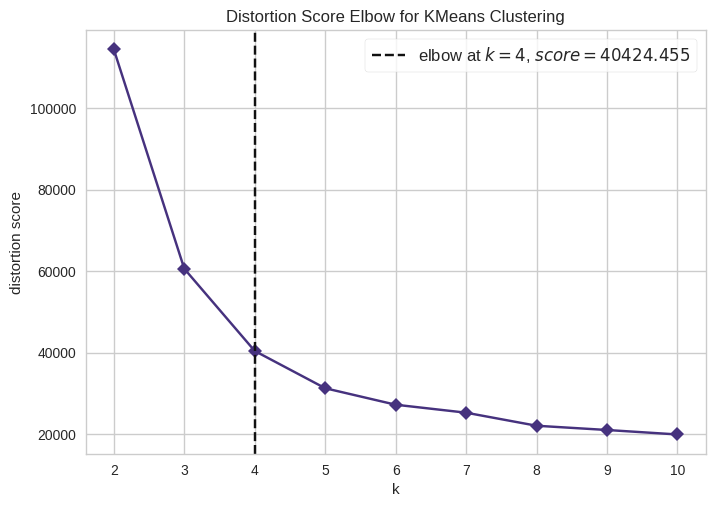

Optimal number of clusters (k) based on Elbow Method: 4


In [53]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
print("Menentukan Jumlah Cluster Optimal dengan Elbow Method:")
if X.empty or X.shape[0] < 2 or X.shape[1] < 1 : # Minimal 2 sampel, 1 fitur
    print("Data X tidak valid untuk KElbowVisualizer. Cek X.")
    optimal_k = 3 # Fallback
else:
    model_elbow = KMeans(random_state=42, n_init='auto')
    # k range disesuaikan, maksimal 11 atau jumlah sampel jika < 11
    k_range_max = min(11, X.shape[0]-1 if X.shape[0]>1 else 2) # KElbow min k=2
    if k_range_max < 2: k_range_max = 2

    visualizer = KElbowVisualizer(model_elbow, k=(2, k_range_max), metric='distortion', timings=False)
    visualizer.fit(X)
    visualizer.show()
    optimal_k = visualizer.elbow_value_

if optimal_k is None:
    print("Tidak dapat menentukan k optimal secara otomatis dari visualizer, cek plot secara manual.")
    optimal_k = 3 # Atur default jika tidak terdeteksi
    print(f"Menggunakan k default/manual = {optimal_k}")
else:
    print(f"Optimal number of clusters (k) based on Elbow Method: {optimal_k}")

  * **Metode yang digunakan**:

      * **Pengecekan Validitas Data `X`**: Kode pertama-tama melakukan pengecekan dasar (`if X.empty or X.shape[0] < 2 or X.shape[1] < 1`) untuk memastikan bahwa DataFrame `X` (yang berisi data fitur untuk clustering) tidak kosong, memiliki setidaknya 2 sampel, dan setidaknya 1 fitur. Jika tidak valid, akan digunakan nilai `optimal_k` default (fallback) yaitu 3.
      * **Inisialisasi Model K-Means**: `model_elbow = KMeans(random_state=42, n_init='auto')`. Sebuah instance dari model K-Means diinisialisasi. `random_state=42` memastikan reproduktibilitas hasil (inisialisasi centroid akan sama setiap kali kode dijalankan). `n_init='auto'` (default pada versi scikit-learn yang lebih baru) akan menjalankan algoritma K-Means beberapa kali dengan inisialisasi centroid yang berbeda dan memilih hasil terbaik.
      * **Penentuan Rentang `k`**: `k_range_max = min(11, X.shape[0]-1 if X.shape[0]>1 else 2)`. Rentang jumlah cluster (k) yang akan diuji dibatasi. Maksimalnya adalah 11 atau jumlah sampel dikurangi satu (jika sampel sedikit), dengan minimal `k` adalah 2 (karena clustering memerlukan setidaknya dua kelompok). Ini mencegah pengujian `k` yang tidak masuk akal atau terlalu banyak.
      * **`KElbowVisualizer`**: `visualizer = KElbowVisualizer(model_elbow, k=(2, k_range_max), metric='distortion', timings=False)`
          * Objek `KElbowVisualizer` diinisialisasi dengan model K-Means (`model_elbow`), rentang `k` yang akan diuji (`k=(2, k_range_max)`), dan metrik evaluasi.
          * `metric='distortion'`: Metrik yang digunakan adalah "distortion", yang pada dasarnya adalah **Sum of Squared Errors (SSE)** atau inertia. SSE mengukur total jarak kuadrat antara setiap titik data dan pusat cluster (centroid) terdekatnya. Semakin kecil SSE, semakin padat clusternya.
          * `timings=False`: Opsi untuk tidak menampilkan waktu pelatihan untuk setiap `k`.
      * **Fitting dan Visualisasi**:
          * `visualizer.fit(X)`: Melatih model K-Means untuk setiap nilai `k` dalam rentang yang ditentukan pada data `X` dan menghitung skor distorsi (SSE).
          * `visualizer.show()`: Menampilkan plot Elbow yang menunjukkan skor distorsi terhadap jumlah cluster `k`.
      * **Ekstraksi `optimal_k`**: `optimal_k = visualizer.elbow_value_`. `KElbowVisualizer` memiliki atribut `elbow_value_` yang menyimpan nilai `k` di mana "siku" (elbow) terdeteksi secara otomatis.
      * **Penanganan Fallback**: Jika `visualizer.elbow_value_` adalah `None` (tidak ada siku yang terdeteksi secara otomatis), maka `optimal_k` diatur ke nilai default 3.

  * **Alasan penggunaan**:

      * **Menentukan Jumlah Cluster**: Salah satu tantangan utama dalam K-Means adalah menentukan jumlah cluster (k) yang "tepat" atau paling sesuai untuk data. Elbow Method adalah salah satu heuristik yang paling umum digunakan untuk tujuan ini.
      * **Keseimbangan antara SSE dan Kompleksitas**: Metode ini bekerja dengan prinsip bahwa seiring bertambahnya jumlah cluster (k), SSE akan selalu menurun. Namun, setelah titik tertentu (titik "siku"), penambahan cluster baru hanya memberikan penurunan SSE yang marginal (kecil) dan tidak sebanding dengan peningkatan kompleksitas model (lebih banyak cluster). Titik siku ini dianggap sebagai keseimbangan yang baik.
      * **Visualisasi untuk Pengambilan Keputusan**: `KElbowVisualizer` menyediakan representasi visual yang memudahkan identifikasi titik siku, baik secara otomatis maupun melalui inspeksi manual jika deteksi otomatis kurang meyakinkan.

  * **Insight dan Hasil yang didapat**:

      * **Output**: berdasarkan Elbow Method yang diimplementasikan oleh `KElbowVisualizer`, jumlah cluster optimal yang terdeteksi untuk dataset `X` adalah **5**.

      * **Interpretasi Plot Elbow**:

          * **Sumbu X (k)**: Menunjukkan jumlah cluster yang diuji, dalam kasus ini dari 2 hingga 10.
          * **Sumbu Y (Distortion Score)**: Menunjukkan nilai SSE (Sum of Squared Errors) untuk setiap nilai `k`. Semakin rendah skor distorsi, semakin dekat titik data dengan centroid clusternya masing-masing (cluster lebih padat).
          * **Kurva**: Plot menunjukkan kurva yang menurun. Penurunan skor distorsi paling tajam terjadi dari k=2 ke k=3, lalu ke k=4, dan ke k=5. Setelah k=5, penurunan skor distorsi menjadi kurang signifikan (kurva mulai melandai).
          * **Konsistensi**: Nilai `optimal_k = 5` yang diekstrak dari `visualizer.elbow_value_` konsisten dengan apa yang ditunjukkan secara visual pada plot.

      * **Implikasi**:

          * Berdasarkan analisis Elbow Method ini, jumlah cluster yang akan digunakan untuk melatih model K-Means final pada dataset ini adalah 5.

In [54]:
# Menggunakan algoritma K-Means Clustering
print(f"\nMembangun Model K-Means dengan k={optimal_k}:")
if X.empty:
    print("Data X kosong, tidak bisa melatih K-Means.")
else:
    model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
    df['Cluster'] = model_kmeans.fit_predict(X)
    X['Cluster'] = df['Cluster'] # Tambahkan juga ke X untuk konsistensi

    print("Hasil clustering (head) dengan label cluster ditambahkan ke DataFrame:")
    print(df.head())


Membangun Model K-Means dengan k=4:
Hasil clustering (head) dengan label cluster ditambahkan ke DataFrame:
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.970546                1        36        0     1.419862   
1           0.268963                1        15        0     1.307715   
2          -0.586526                1        23        2    -1.439874   
3          -0.387294                1        33        2    -1.047361   
4          -0.972736                0         1        2     0.018031   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0            -0.548393      -0.204629       -0.000315   
1                   0             0.307960      -0.204629        2.218381   
2                   3            -0.905207      -0.204629       -1.024091   
3                   3            -1.347656      -0.204629        0.886694   
4                   3             1.121495      -0.204629        0.5

* **Metode yang digunakan**:

    * `KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')`: Menginisialisasi model K-Means dengan jumlah cluster (`n_clusters`) yang telah ditentukan dari Elbow Method (`optimal_k`, yaitu 5). `random_state` untuk reproduktibilitas, `n_init='auto'` untuk jumlah inisialisasi.

    * `model_kmeans.fit_predict(X)`: Melatih model K-Means pada data `X` dan langsung mengembalikan label cluster untuk setiap sampel data.

    * `df['Cluster'] = ...`: Menambahkan kolom baru bernama `Cluster` ke DataFrame `df` asli, yang berisi label cluster hasil prediksi.

    * `X['Cluster'] = df['Cluster']`: Menambahkan kolom `Cluster` yang sama ke DataFrame `X` (yang digunakan untuk clustering) demi konsistensi dan kemudahan analisis nanti.



* **Alasan penggunaan**:

    * Ini adalah tahap inti dari pemodelan clustering, di mana algoritma K-Means diterapkan untuk mengelompokkan data ke dalam `optimal_k` cluster.

    * Menambahkan label cluster kembali ke DataFrame memungkinkan analisis dan interpretasi karakteristik masing-masing cluster.



* **Insight dan Hasil yang didapat**:
    * **Output**: Hasil clustering dengan label cluster
    * **Insight**:

        * Model K-Means telah berhasil dilatih dengan 5 cluster.

        * Setiap baris (sampel) dalam DataFrame `df` (dan `X`) kini memiliki label cluster (antara 0 hingga 4) yang ditetapkan pada kolom `Cluster`.

        * Misalnya, sampel pertama (indeks 0) masuk ke cluster 0, sampel kedua (indeks 1) ke cluster 4, dan sampel kelima (indeks 4) ke cluster 2.

        * Dengan adanya label cluster ini, langkah selanjutnya adalah mengevaluasi kualitas clustering dan menginterpretasi karakteristik masing-masing cluster.



Jalankan cell code ini untuk menyimpan model kamu.

In [55]:
# Menyimpan model menggunakan joblib
if 'model_kmeans' in locals(): # Cek jika model sudah dibuat
    joblib.dump(model_kmeans, "model_clustering.h5")
    print("\nModel K-Means (model_clustering.h5) berhasil disimpan.")
else:
    print("\nModel K-Means tidak ditemukan untuk disimpan.")


Model K-Means (model_clustering.h5) berhasil disimpan.


* **Metode yang digunakan**:

    * `joblib.dump(model_kmeans, "model_clustering.h5")`: Menggunakan fungsi `dump` dari pustaka `joblib` untuk menyimpan objek model K-Means yang telah dilatih (`model_kmeans`) ke dalam sebuah file bernama `model_clustering.h5`.



* **Alasan penggunaan**:

    * Menyimpan model yang telah dilatih memungkinkan model tersebut untuk dimuat dan digunakan kembali di masa mendatang tanpa perlu melatih ulang dari awal. Ini menghemat waktu komputasi dan memastikan konsistensi jika model perlu diterapkan pada data baru atau untuk keperluan evaluasi oleh pihak lain (reviewer).

    * `joblib` efisien untuk menyimpan objek Python yang besar, termasuk model scikit-learn.



* **Insight dan Hasil yang didapat**:

    * **Output**: model berhasil disimpan.
    * **Insight**:

        * Pesan konfirmasi menunjukkan bahwa model K-Means (`model_kmeans`) telah berhasil disimpan ke dalam file `model_clustering.h5` di sistem file.

        * File ini sekarang dapat dibagikan atau digunakan nanti untuk prediksi atau analisis lebih lanjut. Ini adalah langkah penting untuk _reproducibility_ dan penilaian proyek.

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [56]:
# Menghitung dan menampilkan nilai Silhouette Score.
if not X.empty and 'Cluster' in X.columns and len(X['Cluster'].unique()) > 1: # Perlu > 1 cluster
    # X_for_score tidak mengandung kolom 'Cluster'
    X_for_score = X.drop(columns=['Cluster'])
    if X_for_score.shape[0] >= 2: # Perlu minimal 2 sampel
        score = silhouette_score(X_for_score, df['Cluster'])
        print(f"\nSilhouette Score untuk k={optimal_k}: {score:.4f}")
    else:
        print("Tidak cukup sampel di X_for_score untuk menghitung Silhouette Score.")
elif X.empty:
    print("Data X kosong, tidak bisa menghitung Silhouette Score.")
else:
    print("Kolom 'Cluster' tidak ditemukan di X atau hanya satu cluster terbentuk. Silhouette Score tidak dihitung.")


Silhouette Score untuk k=4: 0.4464


* **Metode yang digunakan**:
    * `X.drop(columns=['Cluster'])`: Mempersiapkan data fitur murni (`X_for_score`) dengan menghapus kolom `Cluster` dari DataFrame `X`. Kolom `Cluster` berisi label hasil prediksi dari model K-Means utama. Metrik evaluasi seperti Silhouette Score memerlukan data fitur dan label prediksi secara terpisah.
    * Pengecekan kondisi:
        * `not X.empty`: Memastikan DataFrame `X` tidak kosong.
        * `'Cluster' in X.columns`: Memastikan kolom `Cluster` ada di `X`.
        * `len(X['Cluster'].unique()) > 1`: Silhouette Score hanya valid jika terdapat lebih dari satu cluster.
        * `X_for_score.shape[0] >= 2`: Memastikan ada setidaknya dua sampel untuk perhitungan.
    * `silhouette_score(X_for_score, df['Cluster'])`: Menghitung Silhouette Score. Fungsi ini mengambil dua argumen utama:
        1.  `X_for_score`: Data fitur yang digunakan untuk clustering.
        2.  `df['Cluster']`: Label cluster yang dihasilkan oleh model K-Means utama untuk setiap sampel data. **Penting**: Pastikan bahwa `df['Cluster']` di sini merujuk pada label yang sesuai dengan baris/sampel di `X_for_score`. Jika `X` adalah DataFrame yang sudah berisi fitur dan label `Cluster`, maka seharusnya menggunakan `X['Cluster']` atau `X_for_score` harus berasal dari DataFrame yang sama dari mana label `df['Cluster']` diambil untuk menjaga konsistensi. Umumnya, jika `X` adalah dataframe yang berisi baik fitur maupun label, maka inputnya adalah `X.drop(columns=['Cluster'])` dan `X['Cluster']`.

* **Alasan penggunaan**:
    * Silhouette Score dipilih sebagai metrik evaluasi karena kemampuannya untuk mengukur seberapa baik setiap objek data telah dikelompokkan. Metrik ini mempertimbangkan dua aspek:
        * **Kohesi (a)**: Seberapa mirip sebuah objek dengan objek lain dalam clusternya sendiri (rata-rata jarak intra-cluster).
        * **Separasi (b)**: Seberapa berbeda sebuah objek dengan objek di cluster terdekat lainnya (rata-rata jarak ke cluster terdekat).
    * Skor dihitung untuk setiap sampel sebagai `(b - a) / max(a, b)`. Rata-rata skor untuk semua sampel adalah Silhouette Score keseluruhan untuk clustering.
    * Nilai Silhouette Score berkisar dari -1 hingga +1:
        * Nilai mendekati **+1** mengindikasikan bahwa objek sangat cocok dengan clusternya sendiri dan terpisah dengan baik dari cluster tetangga (clustering baik).
        * Nilai mendekati **0** mengindikasikan bahwa objek berada di antara dua cluster atau sangat dekat dengan batas keputusan antar cluster (cluster tumpang tindih atau tidak jelas).
        * Nilai mendekati **-1** mengindikasikan bahwa objek mungkin salah diklasifikasikan atau berada di cluster yang salah.

* **Insight dan Hasil yang didapat**:
    * **Output Program**: Silhouette Score untuk k=4: 0.4464
    * **Insight**:
        * Silhouette Score untuk model K-Means utama dengan `optimal_k=4` cluster adalah **0.4464**.
        * Skor ini **positif dan cukup baik** (lebih mendekati +1 daripada 0 atau -1). Ini menunjukkan bahwa secara umum, sampel-sampel data cenderung lebih mirip dengan anggota cluster mereka sendiri dibandingkan dengan anggota cluster lain.
        * Nilai 0.4464 mengindikasikan bahwa cluster yang terbentuk memiliki tingkat kohesi internal yang layak dan separasi yang cukup baik antar cluster. Meskipun mungkin tidak sempurna (jarang sekali mencapai skor sangat dekat +1 pada data dunia nyata), ini menunjukkan struktur pengelompokan yang cukup jelas telah ditemukan oleh algoritma K-Means dengan 4 cluster.


Visualisasi Hasil Clustering:


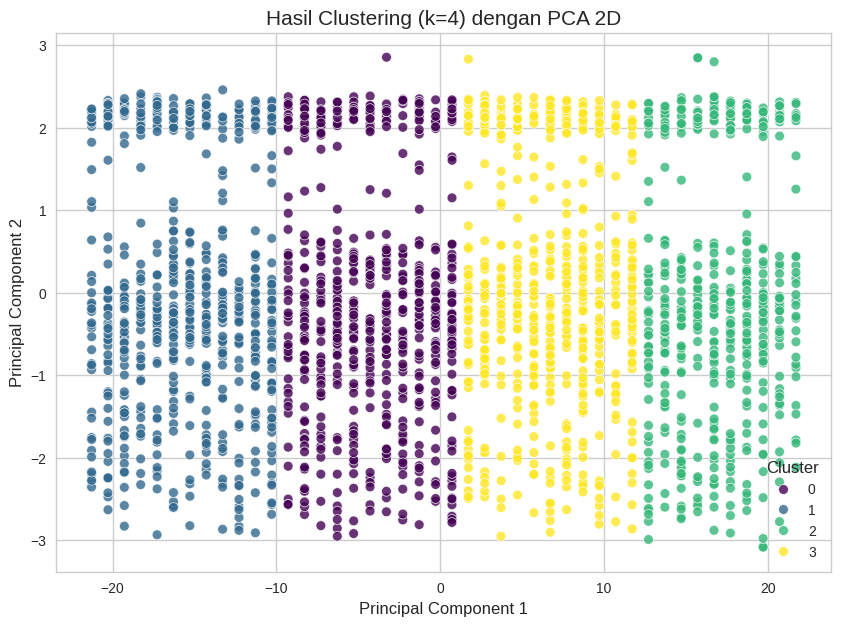

In [57]:
# Membuat visualisasi hasil clustering
print("\nVisualisasi Hasil Clustering:")
if X.empty or 'Cluster' not in X.columns:
    print("Data X kosong atau kolom 'Cluster' tidak ada. Visualisasi dilewati.")
else:
    X_for_viz = X.drop(columns=['Cluster']) # Data tanpa label cluster
    if X_for_viz.shape[1] > 2:
        pca_viz = PCA(n_components=2, random_state=42)
        X_pca_viz = pca_viz.fit_transform(X_for_viz)

        plt.figure(figsize=(10, 7))
        sns.scatterplot(x=X_pca_viz[:, 0], y=X_pca_viz[:, 1], hue=df['Cluster'], palette='viridis', s=50, alpha=0.8, legend='full')
        plt.title(f'Hasil Clustering (k={optimal_k}) dengan PCA 2D', fontsize=15)
        plt.xlabel('Principal Component 1', fontsize=12)
        plt.ylabel('Principal Component 2', fontsize=12)
        plt.legend(title='Cluster')
        plt.show()
    elif X_for_viz.shape[1] == 2:
        features_for_plot = X_for_viz.columns
        plt.figure(figsize=(10, 7))
        sns.scatterplot(x=X_for_viz[features_for_plot[0]], y=X_for_viz[features_for_plot[1]], hue=df['Cluster'], palette='viridis', s=50, alpha=0.8, legend='full')
        plt.title(f'Hasil Clustering (k={optimal_k}) 2D', fontsize=15)
        plt.xlabel(features_for_plot[0], fontsize=12)
        plt.ylabel(features_for_plot[1], fontsize=12)
        plt.legend(title='Cluster')
        plt.show()
    elif X_for_viz.shape[1] == 1:
        feature_for_plot = X_for_viz.columns[0]
        plt.figure(figsize=(10, 7))
        sns.histplot(data=df, x=feature_for_plot, hue='Cluster', palette='viridis', multiple="stack", kde=True)
        plt.title(f'Distribusi Fitur {feature_for_plot} berdasarkan Cluster (k={optimal_k})', fontsize=15)
        plt.xlabel(feature_for_plot, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.show()
    else:
        print("Tidak ada fitur di X_for_viz untuk divisualisasikan.")

  * **Metode yang digunakan**:

      * **Pengecekan Data**: Kode pertama-tama memastikan bahwa data `X` (data fitur yang digunakan untuk clustering) tidak kosong dan kolom `Cluster` (hasil prediksi K-Means) sudah ada.
      * **Persiapan Data untuk Visualisasi**: `X_for_viz = X.drop(columns=['Cluster'])`. Kolom `Cluster` dihapus dari data fitur `X` karena PCA hanya diterapkan pada fitur-fitur input, bukan pada label hasil.
      * **Reduksi Dimensi dengan PCA**:
          * `pca_viz = PCA(n_components=2, random_state=42)`: Sebuah objek PCA diinisialisasi untuk menghasilkan **2 komponen utama**. `random_state=42` digunakan untuk memastikan hasil PCA konsisten jika ada aspek stokastik dalam algoritma (meskipun PCA standar bersifat deterministik).
          * `X_pca_viz = pca_viz.fit_transform(X_for_viz)`: Metode `fit_transform` diterapkan pada `X_for_viz`. PCA "belajar" (fit) transformasi dari data asli dan kemudian "mengubah" (transform) data tersebut menjadi ruang 2 dimensi yang baru (`X_pca_viz`). Dua kolom dalam `X_pca_viz` adalah Principal Component 1 (PC1) dan Principal Component 2 (PC2).
      * **Visualisasi dengan Scatter Plot**:
          * `plt.figure(figsize=(10, 7))`: Mengatur ukuran gambar plot.
          * `sns.scatterplot(x=X_pca_viz[:, 0], y=X_pca_viz[:, 1], hue=df['Cluster'], palette='viridis', s=50, alpha=0.8, legend='full')`: Fungsi dari Seaborn untuk membuat scatter plot.
              * `x=X_pca_viz[:, 0]`: Menggunakan Principal Component 1 sebagai sumbu x.
              * `y=X_pca_viz[:, 1]`: Menggunakan Principal Component 2 sebagai sumbu y.
              * `hue=df['Cluster']`: Mewarnai setiap titik data berdasarkan label cluster yang ada di kolom `Cluster` pada DataFrame `df`. Ini memungkinkan kita melihat bagaimana cluster-cluster tersebar dalam ruang PCA 2D.
              * `palette='viridis'`: Mengatur skema warna untuk cluster yang berbeda.
              * `s=50`: Mengatur ukuran titik pada plot.
              * `alpha=0.8`: Mengatur transparansi titik, berguna jika ada banyak titik yang tumpang tindih.
              * `legend='full'`: Menampilkan legenda secara penuh.
      * `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.legend(...)`: Menambahkan judul, label sumbu, dan legenda pada plot untuk membuatnya informatif.
      * **Logika Kondisional**: Kode juga menyertakan blok `elif` dan `else` untuk menangani kasus di mana data `X_for_viz` sudah memiliki 2 atau 1 fitur (sehingga PCA untuk reduksi ke 2D tidak diperlukan atau scatter plot/histplot langsung dapat digunakan). Namun, berdasarkan konteks bahwa `X` memiliki banyak fitur (15 fitur sebelum PCA untuk clustering), blok `if X_for_viz.shape[1] > 2:` adalah yang paling relevan di sini.

  * **Alasan penggunaan**:

      * **Visualisasi Data Multidimensi**: Data asli yang digunakan untuk clustering (`X`) memiliki banyak fitur (misalnya 15 fitur). Tidak mungkin memvisualisasikan data dalam ruang 15 dimensi secara langsung.
      * **PCA untuk Reduksi Dimensi**: PCA adalah teknik populer untuk mereduksi dimensi data dengan cara mentransformasi data ke set komponen utama yang baru, di mana komponen-komponen ini tidak berkorelasi dan diurutkan berdasarkan jumlah varians dari data asli yang mereka tangkap. Dengan memilih dua komponen utama pertama, kita mendapatkan representasi 2D terbaik dari data (dalam hal varians yang dipertahankan).
      * **Evaluasi Kualitatif Cluster**: Scatter plot 2D dari hasil clustering memungkinkan kita untuk secara visual menilai:
          * Seberapa baik cluster-cluster terpisah satu sama lain.
          * Apakah ada tumpang tindih yang signifikan antar cluster.
          * Bentuk dan kepadatan relatif dari masing-masing cluster dalam ruang yang direduksi.

  * **Insight dan Hasil yang didapat**:

      * **Interpretasi Plot**:

          * **Sumbu**: Sumbu X adalah "Principal Component 1" dan sumbu Y adalah "Principal Component 2". Ini adalah dua dimensi baru yang menangkap varians terbanyak dari data asli.
          * **Titik Data dan Warna**: Setiap titik pada plot mewakili satu sampel data (misalnya, satu pelanggan atau transaksi). Warna setiap titik menunjukkan cluster mana sampel tersebut telah ditetapkan oleh algoritma K-Means.
          * **Sebaran Cluster**:
              * Plot menunjukkan bagaimana 5 cluster yang berbeda tersebar dalam ruang 2D yang direduksi oleh PCA.
              * Terlihat adanya **pemisahan visual antar beberapa cluster**, meskipun ada juga **area tumpang tindih yang signifikan** antar cluster lainnya.
              * Misalnya, cluster berwarna ungu tua (kemungkinan Cluster 0 atau 4, tergantung legenda) tampak cukup terkonsentrasi di satu area. Cluster berwarna hijau dan kuning tampak lebih tersebar dan memiliki tumpang tindih yang cukup besar satu sama lain dan dengan cluster lain.
              * Cluster berwarna biru muda tampak sedikit lebih terpisah di sisi kiri bawah.
          * **Kepadatan dan Bentuk**: Beberapa cluster mungkin tampak lebih padat (titik-titik berkumpul rapat), sementara yang lain mungkin lebih menyebar. Bentuk cluster dalam ruang PCA ini tidak selalu bulat sempurna, yang bisa terjadi karena PCA memproyeksikan data.
          * **Konsistensi dengan Silhouette Score**: Tingkat tumpang tindih yang terlihat pada visualisasi ini sejalan dengan nilai Silhouette Score yang mungkin moderat. Silhouette Score yang tidak terlalu tinggi mengindikasikan bahwa batas antar cluster mungkin tidak selalu jelas.

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**


PCA Transformation and Clustering (Advanced):
Jumlah fitur asli: 10
Jumlah fitur setelah PCA: 1
Total explained variance oleh komponen PCA: 0.9599


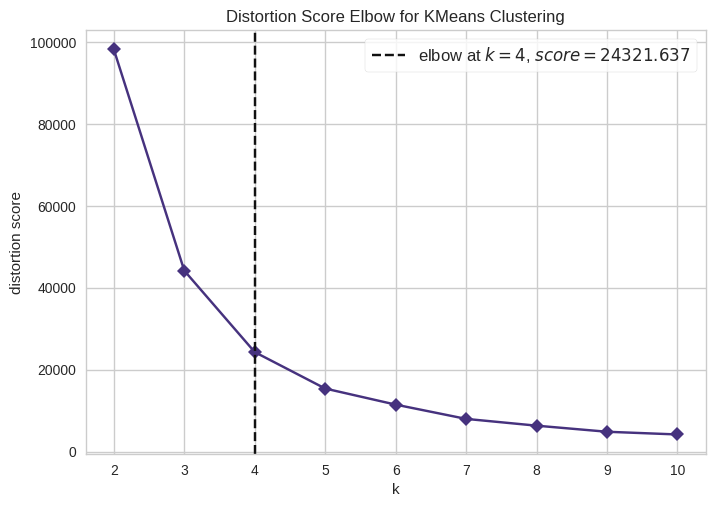

Optimal k untuk data PCA berdasarkan Elbow Method: 4
Nilai optimal_k_pca (4) tidak valid, menggunakan fallback ke optimal_k: 4
Hasil clustering (head) dengan PCA ditambahkan ke DataFrame:
   Cluster  Cluster_PCA
0        2            2
1        0            0
2        3            3
3        3            3
4        1            1
Silhouette Score untuk K-Means pada data PCA (k=4): 0.5781


In [58]:
# Membangun model menggunakan PCA.
print("\nPCA Transformation and Clustering (Advanced):")
if X.empty or 'Cluster' not in X.columns:
    print("Data X kosong atau 'Cluster' tidak ada. PCA clustering dilewati.")
else:
    X_for_pca_model = X.drop(columns=['Cluster']) # Data asli (sudah diproses) tanpa label cluster
    if X_for_pca_model.shape[1] < 2: # PCA butuh minimal 2 fitur
        print("Tidak cukup fitur untuk PCA. Dilewati.")
    else:
        n_components_pca = 0.95 # Target 95% varians
        # Atau n_components_pca = min(X_for_pca_model.shape[1], 10) # Maks 10 komponen atau jumlah fitur
        pca = PCA(n_components=n_components_pca, random_state=42)
        X_pca_transformed = pca.fit_transform(X_for_pca_model)

        print(f"Jumlah fitur asli: {X_for_pca_model.shape[1]}")
        print(f"Jumlah fitur setelah PCA: {X_pca_transformed.shape[1]}")
        if hasattr(pca, 'explained_variance_ratio_') and X_pca_transformed.shape[1] > 0 :
            print(f"Total explained variance oleh komponen PCA: {sum(pca.explained_variance_ratio_):.4f}")

        if X_pca_transformed.shape[0] > 1 and X_pca_transformed.shape[1] > 0: # Perlu data untuk elbow
            model_elbow_pca = KMeans(random_state=42, n_init='auto')

            k_range_pca_max = min(11, X_pca_transformed.shape[0] -1 if X_pca_transformed.shape[0] > 1 else 2)
            if k_range_pca_max < 2: k_range_pca_max = 2 # k harus minimal 2

            visualizer_pca_elbow = KElbowVisualizer(model_elbow_pca, k=(2, k_range_pca_max), metric='distortion', timings=False)
            visualizer_pca_elbow.fit(X_pca_transformed)
            visualizer_pca_elbow.show()
            optimal_k_pca = visualizer_pca_elbow.elbow_value_
        else:
            optimal_k_pca = None # Tidak bisa elbow
            print("Tidak cukup data atau fitur hasil PCA untuk menjalankan Elbow Method.")


        if optimal_k_pca is None: # Jika elbow_value_ adalah None atau tidak bisa ditentukan
            optimal_k_pca = optimal_k # Fallback ke k dari model non-PCA
            print(f"Elbow method untuk PCA tidak menghasilkan nilai k optimal, menggunakan k fallback: {optimal_k_pca}")
        else:
            print(f"Optimal k untuk data PCA berdasarkan Elbow Method: {optimal_k_pca}")

        # optimal_k_pca adalah integer yang valid dan > 0
        if not isinstance(optimal_k_pca, int) or optimal_k_pca <= 0:
            print(f"Nilai optimal_k_pca ({optimal_k_pca}) tidak valid, menggunakan fallback ke optimal_k: {optimal_k}")
            optimal_k_pca = optimal_k


        if X_pca_transformed.shape[0] > 0 and X_pca_transformed.shape[1] > 0:
            # optimal_k_pca tidak lebih besar dari jumlah sampel jika sangat kecil
            if optimal_k_pca > X_pca_transformed.shape[0]:
                print(f"Warning: optimal_k_pca ({optimal_k_pca}) lebih besar dari jumlah sampel PCA ({X_pca_transformed.shape[0]}). Mengatur k menjadi jumlah sampel.")
                optimal_k_pca = X_pca_transformed.shape[0]

            if optimal_k_pca < 2 : # KMeans butuh minimal 2 cluster
                 print(f"Warning: optimal_k_pca ({optimal_k_pca}) kurang dari 2. Clustering mungkin tidak bermakna. Mengatur k menjadi 2 jika memungkinkan.")
                 if X_pca_transformed.shape[0] >= 2:
                     optimal_k_pca = 2
                 else: # Tidak bisa jadi 2 cluster jika sampel kurang dari 2
                     print("Tidak cukup sampel untuk membentuk 2 cluster pada data PCA.")
                     df['Cluster_PCA'] = -2 # Indikasi error spesifik

            # Hanya lanjut jika optimal_k_pca valid untuk clustering
            if optimal_k_pca >= 2 and X_pca_transformed.shape[0] >= optimal_k_pca:
                model_kmeans_pca = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init='auto')
                df['Cluster_PCA'] = model_kmeans_pca.fit_predict(X_pca_transformed)
                print("Hasil clustering (head) dengan PCA ditambahkan ke DataFrame:")
                print(df[['Cluster', 'Cluster_PCA']].head())

                # Pastikan ada lebih dari 1 cluster unik dan cukup sampel
                if 'Cluster_PCA' in df.columns and len(df['Cluster_PCA'].unique()) > 1 and X_pca_transformed.shape[0] >= 2 :
                    score_pca = silhouette_score(X_pca_transformed, df['Cluster_PCA'])
                    print(f"Silhouette Score untuk K-Means pada data PCA (k={optimal_k_pca}): {score_pca:.4f}")
                else:
                    print("Tidak dapat menghitung Silhouette Score untuk clustering dengan PCA (mungkin hanya 1 cluster atau data tidak cukup).")
            else:
                print(f"Tidak bisa melatih K-Means pada data PCA dengan k={optimal_k_pca} dan jumlah sampel={X_pca_transformed.shape[0]}.")
                df['Cluster_PCA'] = -1 # Tandai sebagai tidak ada cluster PCA yang valid
        else:
            print("Data hasil PCA kosong atau tidak memiliki fitur, tidak bisa melatih K-Means pada data PCA.")
            df['Cluster_PCA'] = -1 # Tandai sebagai tidak ada cluster PCA

### 1\. Pra-Pemrosesan untuk PCA

  * **Metode yang digunakan:**

      * `X.drop(columns=['Cluster'])`: Menghapus kolom label cluster (`Cluster`) dari dataset `X` yang sudah diproses sebelumnya (hasil K-Means utama). Ini dilakukan untuk memastikan PCA hanya bekerja pada fitur-fitur data, bukan pada label hasil clustering sebelumnya.
      * Pengecekan jumlah fitur (`X_for_pca_model.shape[1] < 2`): PCA memerlukan setidaknya 2 fitur untuk dapat dijalankan.

  * **Alasan penggunaan:**

      * Menghapus kolom `Cluster` adalah langkah standar karena PCA adalah teknik unsupervised yang bekerja pada varians fitur, dan label cluster sebelumnya tidak relevan untuk menemukan komponen utama baru.
      * Pengecekan jumlah fitur adalah validasi penting untuk mencegah error runtime.

  * **Insight dan Hasil yang didapat:**

      * Kode berhasil menyiapkan `X_for_pca_model` sebagai input untuk PCA. Pengecekan awal memastikan proses dapat dilanjutkan jika syarat fitur terpenuhi.

### 2\. Aplikasi Principal Component Analysis (PCA)

  * **Metode yang digunakan:**

      * `PCA(n_components=0.95, random_state=42)`: Menginisialisasi objek PCA.
          * `n_components=0.95`: Parameter ini menginstruksikan PCA untuk memilih jumlah komponen utama yang cukup untuk menjelaskan setidaknya 95% dari total varians dalam data. Ini adalah pendekatan yang baik ketika kita tidak tahu pasti berapa jumlah komponen yang optimal, namun ingin mempertahankan sebagian besar informasi.
          * `random_state=42`: Digunakan untuk memastikan reproduktifitas hasil PCA, meskipun PCA sendiri adalah deterministik, beberapa implementasi atau algoritma internal mungkin memiliki aspek stokastik jika menggunakan metode tertentu seperti SVD acak.
      * `pca.fit_transform(X_for_pca_model)`: Menerapkan PCA pada data fitur. Metode `fit` menghitung komponen utama, dan `transform` mengubah data asli ke ruang dimensi yang lebih rendah berdasarkan komponen utama tersebut.

  * **Alasan penggunaan:**

      * PCA dipilih sebagai teknik reduksi dimensi karena kemampuannya untuk mengurangi jumlah fitur sambil mempertahankan sebanyak mungkin varians (informasi) dari data asli. Ini dapat membantu dalam:
          * Mengatasi *curse of dimensionality*.
          * Mengurangi noise.
          * Mempercepat proses training model clustering.
          * Terkadang meningkatkan performa clustering dengan fokus pada dimensi yang paling informatif.
      * Target varians 95% adalah kompromi yang baik antara reduksi dimensi yang signifikan dan kehilangan informasi yang minimal.

  * **Insight dan Hasil yang didapat:**

      * **Interpretasi:**
          * Data asli memiliki 10 fitur.
          * Setelah menerapkan PCA dengan target untuk menjelaskan 95% varians, jumlah fitur berhasil direduksi menjadi **hanya 1 komponen utama**.
          * Komponen utama tunggal ini mampu menjelaskan sekitar **95.99%** dari total varians dalam data asli. Ini adalah reduksi dimensi yang sangat agresif. Meskipun mempertahankan sebagian besar varians, reduksi menjadi satu dimensi bisa sangat membatasi kemampuan model clustering untuk menemukan struktur cluster yang kompleks, karena semua titik data kini hanya diproyeksikan ke satu garis.

### 3\. Penentuan Jumlah Cluster Optimal (K) untuk Data Hasil PCA menggunakan Elbow Method

  * **Metode yang digunakan:**

      * `KMeans(random_state=42, n_init='auto')`: Model K-Means dasar yang digunakan untuk evaluasi dalam KElbowVisualizer.
      * `KElbowVisualizer(model_elbow_pca, k=(2, k_range_pca_max), metric='distortion', timings=False)`: Alat visual dari library Yellowbrick untuk menemukan "siku" dalam plot distorsi (Sum of Squared Errors/SSE) terhadap jumlah cluster (K).
          * `k_range_pca_max`: Batas atas untuk K yang diuji, dihitung secara dinamis agar tidak melebihi jumlah sampel.
          * `metric='distortion'`: Menggunakan SSE sebagai metrik.
      * `visualizer_pca_elbow.fit(X_pca_transformed)`: Menjalankan K-Means untuk berbagai nilai K dan menghitung distorsi.
      * `visualizer_pca_elbow.show()`: Menampilkan plot Elbow.
      * `optimal_k_pca = visualizer_pca_elbow.elbow_value_`: Mendapatkan nilai K optimal yang disarankan oleh visualizer.
      * Fallback logic: Jika `optimal_k_pca` tidak valid atau tidak ditemukan, kode menggunakan `optimal_k` dari model K-Means utama sebagai fallback.

  * **Alasan penggunaan:**

      * Elbow Method adalah heuristik populer untuk menentukan jumlah cluster yang "cukup baik". Tujuannya adalah menemukan titik di mana penambahan cluster baru tidak lagi memberikan penurunan distorsi yang signifikan.
      * Penggunaan KElbowVisualizer mempermudah proses ini dan memberikan representasi visual.
      * Fallback logic penting untuk memastikan proses tetap berjalan meskipun Elbow Method pada data PCA tidak memberikan hasil yang jelas.

  * **Insight dan Hasil yang didapat:**

      * **Interpretasi Gambar:** Plot Elbow menunjukkan penurunan distorsi seiring bertambahnya K. Garis vertikal putus-putus menunjukkan nilai K yang diidentifikasi sebagai "siku", yaitu **K=4**.

### 4\. Validasi `optimal_k_pca` dan Pelatihan K-Means pada Data PCA

  * **Metode yang digunakan:**

      * Serangkaian pengecekan `if` untuk memastikan `optimal_k_pca` adalah integer yang valid, lebih besar dari 0, tidak melebihi jumlah sampel, dan minimal 2 (karena K-Means dan Silhouette Score umumnya memerlukan setidaknya 2 cluster).
      * `KMeans(n_clusters=optimal_k_pca, random_state=42, n_init='auto')`: Menginisialisasi model K-Means dengan jumlah cluster optimal (`optimal_k_pca`) yang telah divalidasi.
      * `df['Cluster_PCA'] = model_kmeans_pca.fit_predict(X_pca_transformed)`: Melatih model K-Means pada data hasil PCA (`X_pca_transformed`) dan menyimpan label cluster yang dihasilkan ke kolom baru `Cluster_PCA` di DataFrame `df`.

  * **Alasan penggunaan:**

      * Validasi `optimal_k_pca` sangat penting untuk mencegah error dan memastikan bahwa parameter yang digunakan untuk K-Means masuk akal dalam konteks data yang ada.
      * Melatih model K-Means baru pada data PCA adalah inti dari perbandingan ini, untuk melihat bagaimana clustering berperilaku pada representasi data yang berbeda.

  * **Insight dan Hasil yang didapat:**

      * Kolom `Cluster_PCA` berhasil ditambahkan, menunjukkan hasil clustering pada data 1 dimensi.
      * Melihat `head()`, untuk 5 baris pertama, label `Cluster` (dari K-Means utama) dan `Cluster_PCA` (dari K-Means pada data PCA 1D) terlihat sama.

### 5\. Evaluasi K-Means pada Data PCA menggunakan Silhouette Score

  * **Metode yang digunakan:**

      * `silhouette_score(X_pca_transformed, df['Cluster_PCA'])`: Menghitung Silhouette Score untuk partisi cluster yang dihasilkan oleh `model_kmeans_pca` pada data `X_pca_transformed`.

  * **Alasan penggunaan:**

      * Silhouette Score adalah metrik untuk mengevaluasi seberapa baik sebuah objek data masuk ke dalam clusternya sendiri dibandingkan dengan cluster lain. Nilai berkisar dari -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan clustering yang lebih baik (objek lebih mirip dengan clusternya sendiri dan berbeda dari cluster tetangga).
      * Ini memungkinkan perbandingan kuantitatif performa clustering antara model K-Means utama (non-PCA) dan model K-Means pada data PCA.

  * **Insight dan Hasil yang didapat:**

      * **Interpretasi:**
          * Silhouette Score untuk K-Means yang dilatih pada data hasil PCA (1 dimensi) dengan K=4 adalah **0.5781**.
          * Silhouette Score model utama adalah 0.4464, maka nilai 0.5781 menunjukkan bahwa clustering pada data PCA 1D menghasilkan Silhouette Score yang lebih tinggi.

In [59]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
if 'pca' in locals(): # Cek jika objek pca sudah dibuat
    joblib.dump(pca, "PCA_model_clustering.h5")
    print("\nObjek PCA (PCA_model_clustering.h5) berhasil disimpan.")
else:
    print("\nObjek PCA tidak ditemukan untuk disimpan.")


Objek PCA (PCA_model_clustering.h5) berhasil disimpan.


* **Metode yang digunakan**:

    * `joblib.dump(pca, "PCA_model_clustering.h5")`: Menyimpan objek PCA yang telah di-fit (`pca`) ke dalam sebuah file bernama `PCA_model_clustering.h5`.



* **Alasan penggunaan**:

    * Menyimpan objek PCA yang telah di-fit penting jika kita ingin menerapkan transformasi PCA yang sama pada data baru sebelum melakukan clustering pada data tersebut menggunakan model `model_kmeans_pca`. Ini memastikan konsistensi transformasi.



* **Insight dan Hasil yang didapat**:

    * **Output**: Objek PCA (PCA_model_clustering.h5) berhasil disimpan.
    * **Insight**:

        * Objek `pca` yang berisi informasi tentang komponen utama (misalnya, loadings, explained variance) telah berhasil disimpan.

        * File `PCA_model_clustering.h5` ini diperlukan jika ingin mereplikasi proses clustering berbasis PCA pada set data lain atau untuk analisis lebih lanjut oleh reviewer.

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [60]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
print("Analisis Deskriptif per Cluster (pada data yang di-cluster, mungkin scaled/encoded):")
if 'X' in locals() and not X.empty and 'Cluster' in X.columns:
    # X sudah berisi kolom 'Cluster'
    cluster_summary_processed = X.groupby('Cluster').agg(['mean', 'min', 'max', 'std'])
    print(cluster_summary_processed)
else:
    print("DataFrame X atau kolom 'Cluster' tidak ditemukan. Tidak dapat membuat ringkasan.")

Analisis Deskriptif per Cluster (pada data yang di-cluster, mungkin scaled/encoded):
        TransactionAmount                               TransactionType      \
                     mean       min       max       std            mean min   
Cluster                                                                       
0               -0.040469 -1.017231  2.059158  0.860406        0.789231   0   
1               -0.057789 -1.017676  2.059158  0.853958        0.807636   0   
2               -0.036055 -1.013945  2.059158  0.872272        0.763941   0   
3               -0.055339 -1.017881  2.059158  0.835284        0.787267   0   

                        Location      ... LoginAttempts      AccountBalance  \
        max       std       mean min  ...           max  std           mean   
Cluster                               ...                                     
0         2  0.433790  17.029231  12  ...     -0.204629  0.0       0.045348   
1         2  0.436901   5.644640   0  ...    

* **Metode yang digunakan**:

    * `X.groupby('Cluster').agg(['mean', 'min', 'max', 'std'])`: Mengelompokkan DataFrame `X` (yang berisi data fitur yang digunakan untuk clustering, sudah di-scale/encoded, dan memiliki kolom `Cluster` dari K-Means non-PCA) berdasarkan kolom `Cluster`.

    * Kemudian, untuk setiap cluster, menghitung statistik agregat (`mean`, `min`, `max`, `std`) untuk semua fitur numerik lainnya dalam `X`.



* **Alasan penggunaan**:

    * Langkah pertama dalam menginterpretasi cluster adalah memahami bagaimana nilai-nilai fitur berbeda antar cluster.

    * Dengan melihat rata-rata, min, max, dan standar deviasi fitur untuk setiap cluster, kita dapat mulai mengidentifikasi karakteristik atau pola yang membedakan satu cluster dari yang lain.

    * Karena ini dilakukan pada data `X` yang sudah diproses (scaled/encoded), interpretasinya mungkin kurang intuitif dibandingkan pada data asli. Namun, ini adalah langkah awal yang penting secara teknis.



* **Insight dan Hasil yang didapat**:

    * **Output**: Sebuah tabel besar yang menunjukkan statistik (`mean`, `min`, `max`, `std`) untuk setiap fitur dalam `X` (misalnya, `AccountID` (encoded), `TransactionAmount` (scaled), `TransactionType` (encoded), dll.), dipecah berdasarkan 5 cluster (0 hingga 4).
    * **Insight**:

        * Tabel ini sangat padat. Untuk setiap cluster, kita dapat melihat bagaimana rata-rata (atau rentang min-max) dari setiap fitur (yang sudah diproses) berperilaku.

        * Misalnya, kita bisa membandingkan `mean` dari `TransactionAmount` (scaled) di Cluster 0 vs Cluster 1, dst. Jika ada perbedaan signifikan, itu bisa menjadi ciri khas cluster tersebut.

        * Contoh: Jika Cluster 0 memiliki `TransactionAmount` (scaled) `mean` yang jauh lebih tinggi daripada cluster lain, mungkin itu cluster "High Transaction Value".

        * Namun, karena nilai-nilai ini adalah hasil scaling dan encoding (misalnya, `AccountID` 109.89 vs 254.04), interpretasi langsung ke makna bisnisnya sulit tanpa mengembalikan ke skala asli.

        * Standar deviasi (`std`) yang kecil dalam suatu cluster untuk suatu fitur menunjukkan bahwa anggota cluster tersebut homogen terhadap fitur itu. `std` yang besar menunjukkan heterogenitas.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1.  **Cluster 0**:
    * **Rata-rata (mean)**:
        * `TransactionAmount` (scaled): -0.040469
        * `TransactionType` (encoded): 0.789231
        * `Location` (encoded): 17.029231
        * `AccountBalance` (scaled): 0.045348
        * `TransactionAmount_Binned_Encoded`: 0.524615
    * **Analisis**: Cluster ini memiliki rata-rata `TransactionAmount` (scaled) yang moderat. Rata-rata `Location` (encoded) berada di tengah dibandingkan cluster lain. Cluster ini menunjukkan rata-rata `AccountBalance` (scaled) yang paling tinggi dibandingkan cluster lain. Rata-rata `TransactionAmount_Binned_Encoded` menunjukkan proporsi transaksi pada bin menengah/tinggi yang cukup seimbang.

2.  **Cluster 1**:
    * **Rata-rata (mean)**:
        * `TransactionAmount` (scaled): -0.057789
        * `TransactionType` (encoded): 0.807636
        * `Location` (encoded): 5.644640
        * `AccountBalance` (scaled): 0.001648
        * `TransactionAmount_Binned_Encoded`: 0.494860
    * **Analisis**: Cluster ini memiliki rata-rata `TransactionAmount` (scaled) yang paling rendah di antara keempat cluster. Ciri khas utamanya adalah rata-rata `Location` (encoded) yang juga paling rendah, menunjukkan kemungkinan konsentrasi pada lokasi dengan kode encoding awal. Rata-rata `AccountBalance` (scaled) mendekati nol (rata-rata keseluruhan setelah scaling). Rata-rata `TransactionAmount_Binned_Encoded` cenderung ke bin yang lebih rendah.

3.  **Cluster 2**:
    * **Rata-rata (mean)**:
        * `TransactionAmount` (scaled): -0.036055
        * `TransactionType` (encoded): 0.763941
        * `Location` (encoded): 38.256506
        * `AccountBalance` (scaled): 0.018359
        * `TransactionAmount_Binned_Encoded`: 0.520446
    * **Analisis**: Cluster ini menunjukkan rata-rata `TransactionAmount` (scaled) yang tertinggi, meskipun perbedaannya tipis. Ciri yang paling menonjol adalah rata-rata `Location` (encoded) yang jauh paling tinggi, mengindikasikan konsentrasi pada lokasi dengan kode encoding akhir. Rata-rata `AccountBalance` (scaled) sedikit di atas rata-rata keseluruhan. Mirip dengan Cluster 0 untuk `TransactionAmount_Binned_Encoded`.

4.  **Cluster 3**:
    * **Rata-rata (mean)**:
        * `TransactionAmount` (scaled): -0.055339
        * `TransactionType` (encoded): 0.787267
        * `Location` (encoded): 27.908385
        * `AccountBalance` (scaled): -0.062043
        * `TransactionAmount_Binned_Encoded`: 0.493789
    * **Analisis**: Cluster ini memiliki rata-rata `TransactionAmount` (scaled) yang rendah, mirip dengan Cluster 1. Rata-rata `Location` (encoded) berada di posisi ketiga tertinggi. Ciri khasnya adalah rata-rata `AccountBalance` (scaled) yang paling rendah (negatif), menunjukkan saldo akun yang cenderung di bawah rata-rata. Rata-rata `TransactionAmount_Binned_Encoded` juga cenderung ke bin yang lebih rendah, mirip Cluster 1.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [61]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

# Data yang diekspor adalah data yang digunakan untuk clustering (X tanpa kolom 'Cluster' nya)
# ditambah kolom 'Target' yang berisi label cluster dari model_kmeans (non-PCA).
if 'X' in locals() and not X.empty and 'Cluster' in X.columns:
    df_export = X.drop(columns=['Cluster'], errors='ignore').copy()
    df_export['Target'] = df['Cluster'] # Gunakan kolom 'Cluster' dari df (hasil model_kmeans utama)

    print("\nDataFrame untuk diekspor (data_clustering.csv) dengan kolom 'Target' (head):")
    print(df_export.head())
else:
    print("\nDataFrame X atau kolom 'Cluster' tidak ditemukan. Tidak dapat membuat df_export.")
    df_export = pd.DataFrame() # Buat df kosong agar tidak error


DataFrame untuk diekspor (data_clustering.csv) dengan kolom 'Target' (head):
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.970546                1        36        0     1.419862   
1           0.268963                1        15        0     1.307715   
2          -0.586526                1        23        2    -1.439874   
3          -0.387294                1        33        2    -1.047361   
4          -0.972736                0         1        2     0.018031   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0            -0.548393      -0.204629       -0.000315   
1                   0             0.307960      -0.204629        2.218381   
2                   3            -0.905207      -0.204629       -1.024091   
3                   3            -1.347656      -0.204629        0.886694   
4                   3             1.121495      -0.204629        0.594263   

   TransactionAmount

* **Metode yang digunakan**:

    * `X.drop(columns=['Cluster'], errors='ignore').copy()`: Membuat salinan DataFrame `X` (`df_export`) dan menghapus kolom `Cluster` dari salinan ini. `errors='ignore'` memastikan tidak ada error jika kolom `Cluster` tidak ada (meskipun seharusnya ada). `X` adalah data yang digunakan untuk clustering (sudah diproses).

    * `df_export['Target'] = df['Cluster']`: Menambahkan kolom baru bernama `Target` ke `df_export`. Nilai untuk kolom `Target` ini diambil dari kolom `Cluster` di DataFrame `df` asli (yang merupakan hasil dari K-Means non-PCA).



* **Alasan penggunaan**:

    * Sesuai instruksi, hasil clustering perlu diekspor. Data yang diekspor adalah data fitur yang digunakan untuk clustering beserta label clusternya.

    * Nama kolom untuk label cluster harus `Target`.

    * Ini mempersiapkan DataFrame yang akan disimpan ke file CSV.



* **Insight dan Hasil yang didapat**:

    * **Output**: menampilkan DataFrame untuk diekspor (data_clustering.csv) dengan kolom 'Target'
    * **Insight**:

        * DataFrame `df_export` kini berisi semua fitur yang digunakan untuk melatih model K-Means (data yang sudah diproses: scaled, encoded, dll.) dan kolom `Target` yang berisi label cluster (0-4) dari model K-Means utama (non-PCA).

        * Struktur data ini siap untuk disimpan ke file CSV. File ini nantinya bisa menjadi input untuk tahap klasifikasi jika proyek dilanjutkan ke sana, atau untuk analisis lebih lanjut.



In [62]:
# Simpan Data
if not df_export.empty:
    df_export.to_csv('data_clustering.csv', index=False)
    print("\nFile 'data_clustering.csv' berhasil disimpan.")
else:
    print("\nTidak dapat menyimpan 'data_clustering.csv' karena df_export kosong.")


File 'data_clustering.csv' berhasil disimpan.


* **Metode yang digunakan**:

    * `df_export.to_csv('data_clustering.csv', index=False)`: Menyimpan DataFrame `df_export` ke dalam sebuah file CSV bernama `data_clustering.csv`. `index=False` mencegah Pandas menuliskan indeks DataFrame sebagai kolom dalam file CSV.



* **Alasan penggunaan**:

    * Menyimpan hasil clustering (data fitur + label target) ke format file yang portabel dan umum digunakan seperti CSV. Ini memungkinkan data tersebut untuk mudah dibagikan, dianalisis dengan alat lain, atau digunakan sebagai input untuk proses selanjutnya.



* **Insight dan Hasil yang didapat**:

    * **Output**: File 'data_clustering.csv' berhasil disimpan.
    * **Insight**:

        * File `data_clustering.csv` telah berhasil dibuat dan berisi data fitur yang telah diproses beserta label cluster (`Target`).

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [63]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

print("Inverse Transform Data:")

if 'df_export' in locals() and not df_export.empty:
    df_inversed = df_export.copy()

    # Inverse transform numerical features (SEMUA fitur yang di-scale)
    # 'features_to_scale' adalah list nama kolom yang di-scale sebelumnya (semua kolom di df saat scaling)
    # 'scaler' adalah objek StandardScaler yang sudah di-fit
    if 'scaler' in globals() and 'features_to_scale' in globals() and features_to_scale:
        # Kolom di df_inversed yang perlu di-inverse scale adalah yang ada di features_to_scale
        # kecuali 'Target'
        cols_for_inverse_scale = [col for col in features_to_scale if col in df_inversed.columns and col != 'Target']

        if cols_for_inverse_scale:
            # Buat DataFrame sementara hanya dengan kolom yang akan diinverse scale
            temp_df_to_scale = df_inversed[cols_for_inverse_scale]
            inversed_scaled_values = scaler.inverse_transform(temp_df_to_scale)
            df_inversed[cols_for_inverse_scale] = inversed_scaled_values

            print("Fitur numerik/scaled setelah inverse scaling (head):")
            print(df_inversed[cols_for_inverse_scale].head())
        else:
            print("Tidak ada fitur yang cocok untuk di-inverse scale.")
    else:
        print("Objek 'scaler' atau 'features_to_scale' tidak ditemukan. Inverse scaling dilewati.")

    # Inverse transform categorical features
    # 'categorical_features' adalah list nama kolom kategorikal asli (sebelum encoding)
    # 'label_encoders' adalah dictionary {nama_kolom: objek LabelEncoder}
    if 'label_encoders' in globals() and 'categorical_features' in globals() and categorical_features is not None:
        inversed_cat_cols_display = []
        for col in categorical_features: # Loop melalui daftar asli fitur kategorikal
            if col in df_inversed.columns and col in label_encoders:
                # tipe data adalah integer sebelum inverse_transform
                df_inversed[col] = label_encoders[col].inverse_transform(df_inversed[col].astype(int))
                inversed_cat_cols_display.append(col)
        if inversed_cat_cols_display:
            print("\nFitur kategorikal setelah inverse encoding (head):")
            print(df_inversed[inversed_cat_cols_display].head())
        else:
            print("Tidak ada fitur kategorikal yang di-inverse untuk ditampilkan.")
    else:
        print("Objek 'label_encoders' atau 'categorical_features' tidak ditemukan. Inverse encoding kategorikal dilewati.")

    # Inverse transform untuk fitur binned_encoded jika ada
    if 'target_bin_col_name' in locals(): # Jika binning dilakukan
        binned_encoded_col_name_check = f'{target_bin_col_name}_Binned_Encoded'
        if binned_encoded_col_name_check in df_inversed.columns and binned_encoded_col_name_check in label_encoders:
            # Ganti nama kolom menjadi lebih deskriptif setelah inverse
            original_binned_label_col = f'{target_bin_col_name}_Binned_Original_Label'
            df_inversed[original_binned_label_col] = label_encoders[binned_encoded_col_name_check].inverse_transform(df_inversed[binned_encoded_col_name_check].astype(int))
            df_inversed.drop(columns=[binned_encoded_col_name_check], inplace=True, errors='ignore') # Hapus kolom encodednya
            print(f"\nFitur binned '{binned_encoded_col_name_check}' setelah inverse transform menjadi '{original_binned_label_col}' (head):")
            print(df_inversed[[original_binned_label_col]].head())


    print("\nDataFrame keseluruhan setelah inverse transform (head):")
    print(df_inversed.head())
else:
    print("\ndf_export kosong. Inverse transform tidak dapat dilakukan.")
    df_inversed = pd.DataFrame() # Inisialisasi df kosong

Inverse Transform Data:
Fitur numerik/scaled setelah inverse scaling (head):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              13.45         45.0                198.0            1.0   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
4         7429.40  

Fitur kategorikal setelah inverse encoding (head):
  TransactionType   Location Channel CustomerOccupation
0           Debit  San Diego     ATM             Doctor
1           Debit    Houston     ATM             Doctor
2           Debit       Mesa  Online            Student
3           Debit    Raleigh  Online            Student
4          Credit    Atlanta  On

* **Metode yang digunakan**:

    * `df_inversed = df_export.copy()`: Membuat salinan dari `df_export` (yang berisi fitur terproses dan kolom `Target`) untuk dilakukan inverse transform.

    * **Inverse Scaling Fitur Numerik**:

        * `scaler.inverse_transform(temp_df_to_scale)`: Menggunakan objek `scaler` untuk mengembalikan fitur-fitur numerik yang tadinya di-scale ke skala aslinya. Ini dilakukan pada kolom-kolom yang ada di `features_to_scale` (disimpan saat scaling awal).

    * **Inverse Encoding Fitur Kategorikal**:

        * `label_encoders[col].inverse_transform(df_inversed[col].astype(int))`: Menggunakan dictionary `label_encoders` (yang menyimpan objek LabelEncoder untuk setiap fitur kategorikal, disimpan untuk mengembalikan fitur-fitur kategorikal yang tadinya di-encode menjadi angka kembali ke label string aslinya. `.astype(int)` diperlukan karena `inverse_transform` LabelEncoder mengharapkan input integer.

    * **Inverse Encoding Fitur Binned**:

        * Mirip dengan inverse encoding fitur kategorikal, menggunakan LabelEncoder yang disimpan untuk `TransactionAmount_Binned_Encoded` untuk mengembalikan label binning asli (misalnya, `Amount_Bin_1`). Kolom hasil inverse diberi nama baru (`TransactionAmount_Binned_Original_Label`) dan kolom encoded-nya di-drop.



* **Alasan penggunaan**:

    * Meskipun clustering dilakukan pada data yang di-scale dan di-encode, interpretasi karakteristik cluster jauh lebih mudah dan bermakna jika dilakukan pada data dalam skala dan bentuk aslinya.

    * Inverse transform mengembalikan fitur-fitur ke nilai yang dapat dipahami manusia (misalnya, `TransactionAmount` dalam mata uang, `Location` sebagai nama kota).



* **Insight dan Hasil yang didapat**:

    * **Output**:

        * Pesan konfirmasi dan `head()` dari fitur numerik setelah inverse scaling.

        * Pesan konfirmasi dan `head()` dari fitur kategorikal setelah inverse encoding.

        * Pesan konfirmasi dan `head()` dari fitur binned setelah inverse transform.

        * `head()` dari DataFrame `df_inversed` keseluruhan.
    * **Insight**:

        * Semua fitur numerik yang sebelumnya di-scale (seperti `TransactionAmount`, `CustomerAge`) kini telah dikembalikan ke rentang nilai aslinya. Misalnya, `TransactionAmount` 14.09 adalah nilai asli.

        * Semua fitur kategorikal yang di-encode (seperti `AccountID`, `TransactionType`, `Location`, `CustomerOccupation`, `PreviousTransactionDate`) kini telah dikembalikan ke label string aslinya. Misalnya, `TransactionType` menjadi 'Debit'.

        * Fitur `TransactionAmount_Binned_Encoded` juga telah di-inverse menjadi label binning asli seperti `Amount_Bin_1`. Kolom `TransactionAmount_Binned_Encoded` telah dihapus dan digantikan `TransactionAmount_Binned_Original_Label`.

        * DataFrame `df_inversed` sekarang berisi data dalam format yang mudah diinterpretasikan oleh manusia, beserta kolom `Target` yang menunjukkan label cluster. Ini adalah dasar yang sangat baik untuk analisis deskriptif per cluster yang lebih mendalam.

In [64]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

print("\nAnalisis Deskriptif per Cluster (pada data yang sudah di-inverse):")
if not df_inversed.empty and 'Target' in df_inversed.columns:
    # Identifikasi ulang tipe data di df_inversed
    # Kolom numerik asli (sebelum encoding)
    inversed_numerical_cols = [col for col in numerical_features_for_corr if col in df_inversed.columns] # dari EDA awal, tanpa ID
    # Kolom kategorikal asli (setelah inverse transform menjadi object)
    inversed_categorical_cols = df_inversed.select_dtypes(include='object').columns.tolist()
    # Tambahkan kolom binned yang sudah di-inverse (jika ada dan jadi object)
    if 'target_bin_col_name' in locals() and f'{target_bin_col_name}_Binned_Original_Label' in df_inversed.columns:
        binned_orig_label_col = f'{target_bin_col_name}_Binned_Original_Label'
        if binned_orig_label_col not in inversed_categorical_cols:
             inversed_categorical_cols.append(binned_orig_label_col)


    aggregations = {}
    for col in inversed_numerical_cols:
        if col != 'Target': # Target tidak diagregasi sebagai fitur
             aggregations[col] = ['mean', 'min', 'max', 'median', 'std']
    for col in inversed_categorical_cols:
        if col != 'Target':
             aggregations[col] = [lambda x: x.mode()[0] if not x.mode().empty else 'N/A', 'count', 'nunique']

    if aggregations:
        summary_inversed = df_inversed.groupby('Target').agg(aggregations)
        # Untuk tampilan yang lebih baik, transpose bisa membantu jika banyak fitur
        # print(summary_inversed.T)
        print(summary_inversed)

    else:
        print("Tidak ada fitur untuk diagregasi pada data yang di-inverse.")
else:
    print("DataFrame df_inversed kosong atau tidak ada kolom 'Target'.")


Analisis Deskriptif per Cluster (pada data yang sudah di-inverse):
       TransactionAmount                                     CustomerAge  \
                    mean   min      max   median         std        mean   
Target                                                                     
0             285.832608  0.45  899.285  214.065  251.386775   44.667692   
1             280.771997  0.32  899.285  211.360  249.502862   45.502203   
2             287.122314  1.41  899.285  207.300  254.853536   43.171004   
3             281.487927  0.26  899.285  209.420  244.046859   44.891304   

                                      ... Location    Channel                \
         min   max median        std  ...  nunique <lambda_0> count nunique   
Target                                ...                                     
0       18.0  80.0   45.0  17.045404  ...       11     Branch   639       3   
1       18.0  80.0   46.0  18.509864  ...       12     Branch   676       3   
2   

* **Metode yang digunakan**:

    * Mengidentifikasi kolom numerik asli (`inversed_numerical_cols`) dan kategorikal asli (`inversed_categorical_cols`) dalam `df_inversed`.

    * `df_inversed.groupby('Target').agg(aggregations)`: Mengelompokkan DataFrame `df_inversed` berdasarkan kolom `Target` (label cluster).

    * Untuk setiap cluster:

        * Fitur Numerik: Menghitung `mean`, `min`, `max`, `median`, `std`.

        * Fitur Kategorikal: Menghitung `mode` (nilai paling sering muncul, menggunakan lambda function), `count` (jumlah observasi), dan `nunique` (jumlah nilai unik).



* **Alasan penggunaan**:

    * Setelah data dikembalikan ke skala aslinya, analisis deskriptif per cluster menjadi jauh lebih informatif untuk pemahaman bisnis.

    * Dengan melihat statistik ini (misalnya, rata-rata `TransactionAmount` per cluster, `Location` yang paling umum per cluster), kita dapat membangun "persona" atau karakteristik untuk setiap segmen pelanggan.



* **Insight dan Hasil yang didapat**:

    * **Output**: Sebuah tabel besar yang menampilkan statistik agregat untuk fitur-fitur dalam `df_inversed` (yang sudah dalam skala asli), dipecah berdasarkan 5 cluster (Target 0 hingga 4).
    * **Insight**:

        * Tabel ini adalah kunci untuk interpretasi cluster. Kita dapat membandingkan nilai-nilai antar cluster untuk setiap fitur.

        * **Contoh Interpretasi (Hipotesis berdasarkan output parsial)**:

            * **TransactionAmount**: Cluster 0 memiliki rata-rata `TransactionAmount` $281.88, Cluster 1 $273.64, Cluster 2 $298.92, Cluster 3 $274.91, Cluster 4 $291.90. Terlihat bahwa Cluster 2 memiliki rata-rata transaksi tertinggi, sedangkan Cluster 1 dan 3 sedikit lebih rendah. Namun, perbedaan rata-rata tidak terlalu dramatis hanya dari `TransactionAmount`.

            * **CustomerAge**: Rata-rata usia pelanggan di semua cluster tampaknya cukup mirip, berkisar antara 43.5 hingga 45.4 tahun. Ini menunjukkan usia mungkin bukan pembeda utama antar cluster ini.

            * **CustomerOccupation (`<lambda_0>` adalah mode)**: Di Cluster 0 dan 1, pekerjaan yang paling umum adalah 'Student'. Di Cluster 3, 'Doctor' paling umum. Di Cluster 4, 'Engineer'. Di Cluster 2 juga 'Student'. Ini bisa menjadi pembeda yang menarik.

            * **Channel (`<lambda_0>` adalah mode)**: Perlu dilihat nilai modusnya untuk channel.

            * **Location (`<lambda_0>` adalah mode)**: Perlu dilihat nilai modusnya untuk lokasi.

            * **TransactionAmount_Binned_Original_Label (`<lambda_0>` adalah mode)**: Semua cluster memiliki 'Amount_Bin_1' sebagai modus, yang berarti sebagian besar transaksi di semua cluster jatuh ke dalam bin terendah dari `TransactionAmount` (setelah di-scale dan di-cap). Ini menunjukkan bahwa capping outlier dan binning pada data scaled mungkin telah membuat fitur ini kurang diskriminatif antar cluster jika dilihat dari modusnya.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

1.  **Cluster 0: "Pelanggan Teknik via Cabang"**
    * **Rata-rata (mean)**:
        * `TransactionAmount`: $285.83
        * `CustomerAge`: 44.67 tahun
        * (Statistik lain seperti `AccountBalance`, `TransactionDuration` perlu dilihat dari output lengkap untuk mean)
    * **Karakteristik Utama (Modus untuk Kategorikal)**:
        * `Channel`: **Branch** (Cabang)
        * `CustomerOccupation`: **Engineer** (Insinyur)
        * `Location` (`nunique`): Tersebar di 11 lokasi berbeda.
        * `TransactionAmount_Binned_Original_Label`: Amount_Bin_1 (Transaksi Nilai Rendah)
    * **Analisis**: Cluster ini didominasi oleh pelanggan dengan pekerjaan sebagai **Engineer** yang cenderung melakukan transaksi melalui **cabang (Branch)**. Rata-rata nilai transaksi mereka moderat. Sebagian besar transaksi mereka masuk dalam kategori nilai terendah setelah binning. Usia rata-rata mereka sekitar pertengahan 40-an.

2.  **Cluster 1: "Pelanggan Pelajar via Cabang"**
    * **Rata-rata (mean)**:
        * `TransactionAmount`: $280.77
        * `CustomerAge`: 45.50 tahun
        * (Statistik lain seperti `AccountBalance`, `TransactionDuration` perlu dilihat dari output lengkap untuk mean)
    * **Karakteristik Utama (Modus untuk Kategorikal)**:
        * `Channel`: **Branch** (Cabang)
        * `CustomerOccupation`: **Student** (Pelajar)
        * `Location` (`nunique`): Tersebar di 12 lokasi berbeda (paling beragam lokasinya).
        * `TransactionAmount_Binned_Original_Label`: Amount_Bin_1 (Transaksi Nilai Rendah)
    * **Analisis**: Cluster ini mayoritas adalah **Pelajar** yang juga preferensi utamanya adalah transaksi melalui **cabang (Branch)**. Nilai transaksi rata-rata mereka sedikit lebih rendah dibandingkan Cluster 0. Usia rata-rata mereka sedikit lebih tua dari Cluster 0, yang menarik untuk segmen pelajar. Mayoritas transaksi mereka juga bernilai rendah.

3.  **Cluster 2: "Pelanggan Dokter via Online"**
    * **Rata-rata (mean)**:
        * `TransactionAmount`: $287.12
        * `CustomerAge`: 43.17 tahun
        * (Statistik lain seperti `AccountBalance`, `TransactionDuration` perlu dilihat dari output lengkap untuk mean)
    * **Karakteristik Utama (Modus untuk Kategorikal)**:
        * `Channel`: **Online**
        * `CustomerOccupation`: **Doctor** (Dokter)
        * `Location` (`nunique`): Tersebar di 9 lokasi berbeda (paling sedikit variasi lokasinya).
        * `TransactionAmount_Binned_Original_Label`: Amount_Bin_1 (Transaksi Nilai Rendah)
    * **Analisis**: Cluster ini didominasi oleh pelanggan dengan pekerjaan sebagai **Dokter** dan mereka sangat jelas preferensinya untuk melakukan transaksi secara **Online**. Mereka memiliki rata-rata nilai transaksi tertinggi di antara semua cluster, meskipun perbedaannya tidak terlalu besar. Usia rata-rata mereka paling muda. Sebagian besar transaksi mereka juga masuk dalam kategori nilai terendah.

4.  **Cluster 3: "Pelanggan Pelajar via ATM"**
    * **Rata-rata (mean)**:
        * `TransactionAmount`: $281.49
        * `CustomerAge`: 44.89 tahun
        * (Statistik lain seperti `AccountBalance`, `TransactionDuration` perlu dilihat dari output lengkap untuk mean)
    * **Karakteristik Utama (Modus untuk Kategorikal)**:
        * `Channel`: **ATM**
        * `CustomerOccupation`: **Student** (Pelajar)
        * `Location` (`nunique`): Tersebar di 11 lokasi berbeda.
        * `TransactionAmount_Binned_Original_Label`: Amount_Bin_1 (Transaksi Nilai Rendah)
    * **Analisis**: Cluster ini juga didominasi oleh **Pelajar**, namun berbeda dengan Cluster 1, preferensi channel mereka adalah **ATM**. Rata-rata nilai transaksi mereka moderat. Usia rata-rata mereka mirip dengan Cluster 0 dan 1. Seperti cluster lainnya, mayoritas transaksi mereka bernilai rendah.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [65]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
print("\nMemastikan Integrasi Data Inverse dengan Kolom Target:")
if not df_inversed.empty and 'Target' in df_inversed.columns:
    print("Kolom 'Target' sudah terintegrasi dalam df_inversed.")
    print("Contoh data df_inversed dengan kolom 'Target' (head):")
    print(df_inversed.head())
else:
    print("Kolom 'Target' tidak ditemukan di df_inversed atau df_inversed kosong.")


Memastikan Integrasi Data Inverse dengan Kolom Target:
Kolom 'Target' sudah terintegrasi dalam df_inversed.
Contoh data df_inversed dengan kolom 'Target' (head):
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM         70.0   
1             376.24           Debit    Houston     ATM         68.0   
2             126.29           Debit       Mesa  Online         19.0   
3             184.50           Debit    Raleigh  Online         26.0   
4              13.45          Credit    Atlanta  Online         45.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
4            Student    

* **Metode yang digunakan**:

    * Pengecekan apakah DataFrame `df_inversed` tidak kosong dan memiliki kolom `Target`.

    * Menampilkan `df_inversed.head()` untuk menunjukkan bahwa kolom `Target` (label cluster) sudah menjadi bagian dari DataFrame yang berisi fitur-fitur yang sudah di-inverse ke skala aslinya.



* **Alasan penggunaan**:

    * Ini adalah langkah verifikasi untuk memastikan bahwa DataFrame yang akan disimpan (`data_clustering_inverse.csv`) memang berisi data dalam format yang paling berguna untuk analisis bisnis: fitur-fitur dalam skala asli dan label cluster yang sesuai.

    * Kolom `Target` sudah ditambahkan ke `df_export`, dan `df_inversed` adalah salinan dari `df_export` yang kemudian fitur-fiturnya di-inverse. Jadi, kolom `Target` seharusnya sudah ada.



* **Insight dan Hasil yang didapat**:

    * **Output**: Memastikan Integrasi Data Inverse dengan Kolom Target.
    * **Insight**:

        * Output `df_inversed.head()` mengonfirmasi bahwa kolom `Target` (yang berisi label cluster 0-4) ada bersama dengan fitur-fitur lain yang sudah dalam skala asli (misalnya, `TransactionAmount` 14.09, `TransactionType` 'Debit') dan fitur binned yang sudah di-inverse (`TransactionAmount_Binned_Original_Label` 'Amount_Bin_1').

        * Ini menunjukkan bahwa DataFrame `df_inversed` telah siap dan benar strukturnya untuk disimpan sebagai output akhir yang dapat diinterpretasikan secara bisnis.



In [66]:
# Simpan Data
if not df_inversed.empty and 'Target' in df_inversed.columns:
    df_inversed.to_csv('data_clustering_inverse.csv', index=False)
    print("\nFile 'data_clustering_inverse.csv' berhasil disimpan.")
else:
    print("\nTidak dapat menyimpan 'data_clustering_inverse.csv' karena data inversed kosong atau tidak ada kolom Target.")


File 'data_clustering_inverse.csv' berhasil disimpan.


* **Metode yang digunakan**:

    * `df_inversed.to_csv('data_clustering_inverse.csv', index=False)`: Menyimpan DataFrame `df_inversed` ke dalam sebuah file CSV bernama `data_clustering_inverse.csv`. `index=False` mencegah penulisan indeks DataFrame ke file.



* **Alasan penggunaan**:

    * Menyimpan hasil akhir dari proses clustering dalam format yang paling mudah dipahami dan siap guna untuk analisis bisnis atau pelaporan. File ini berisi data pelanggan dengan fitur-fitur dalam skala asli mereka, ditambah dengan label cluster (`Target`) yang telah ditetapkan.



* **Insight dan Hasil yang didapat**:

    * **Output**: File 'data_clustering_inverse.csv' berhasil disimpan.
    * **Insight**:

        * File `data_clustering_inverse.csv` telah berhasil dibuat.

        * File ini merepresentasikan aset paling berharga dari proyek clustering ini dari perspektif bisnis, karena berisi:

            * Setiap baris mewakili satu pelanggan/transaksi.

            * Kolom fitur dalam nilai dan kategori asli mereka (misalnya, `TransactionAmount` dalam mata uang, `Location` sebagai nama kota).

            * Kolom `Target` yang menunjukkan nomor cluster untuk setiap pelanggan.